# EDA of the data
* Performing an EDA of the data to discover preliminary patterns and problems which we will use in our preprocessing of the data

# Importing required libraries

In [ ]:
# TODO : work out if the smart linear interpolation is working properly
# TODO : add to the smart linear interpolation a check for if the first / last timestep of each day is nan before linear interpolating

In [645]:
df_energy

meter_id  2017-01-01 00:00:00  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                          ...                  ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.011   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090                0.015   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.222   
3246  0x47218b46abb2fcaade487a211911406dc6e13730                0.195   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                0.023   

      2017-01-01 00:30:00  2017-01-01 01:00:00  2017-01-01 01:30:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                1.089                0.014                0.204   
3244                1.523                0.105                0.296   
3245                0.276                0.097                0.058   
3246                2.881                1.765                1.391   
3247                2.307                1.403                1.471   

      2017-01-01 02:00:00  2017-01-01 02:30:00  2017-01-01 03:00:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                0.015                0.159                0.014   
3244                0.067                0.171                0.025   
3245                0.045                0.045                0.038   
3246                1.609                1.362                1.352   
3247                1.421                1.305                1.299   

      2017-01-01 03:30:00  2017-01-01 04:00:00  2017-01-01 04:30:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                0.013                0.174                0.013   
3244                0.260                0.013                0.024   
3245                0.034                0.043                0.044   
3246                1.321                0.701                0.784   
3247                0.657                0.054                0.122   

      2017-01-01 05:00:00  2017-01-01 05:30:00  2017-01-01 06:00:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                0.014                0.014                0.014   
3244                0.012           

# inspecting the 20th of october for one of the meters which said there were 2 consecutive missing values
TODO: THIS SHOWS THAT WE DEFINITELY NEED TO HANDLE INTERPOLATING WHEN THE FIRST AND LAST VALUES OF EACH DAY START WITH NAN

In [657]:
max_seq_nan_limit=8 # each time step is half an hour 
#test = df_energy.apply(lambda row: , axis=1)
#test = df_energy.apply(lambda row: row.isnull().rolling(window=max_seq_nan_limit+1).sum().max(), axis=1)
#test = df_energy.apply(lambda row: np.any(row.isnull().rolling(window=max_seq_nan_limit+1).sum() >= max_seq_nan_limit), axis=1)
test = df_energy.apply(lambda row: row.isnull().rolling(window=max_seq_nan_limit+1).sum(), axis=1)

meter_id  2017-01-01 00:00:00  2017-01-01 00:30:00  2017-01-01 01:00:00  \
0          NaN                  NaN                  NaN                  NaN   
1          NaN                  NaN                  NaN                  NaN   
2          NaN                  NaN                  NaN                  NaN   
3          NaN                  NaN                  NaN                  NaN   
4          NaN                  NaN                  NaN                  NaN   
...        ...                  ...                  ...                  ...   
3243       NaN                  NaN                  NaN                  NaN   
3244       NaN                  NaN                  NaN                  NaN   
3245       NaN                  NaN                  NaN                  NaN   
3246       NaN                  NaN                  NaN                  NaN   
3247       NaN                  NaN                  NaN                  NaN   

      2017-01-01 01:30:00  2017-01-01 02:00:00  2017-01-01 02:30:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                  NaN                  NaN                  NaN   
3244                  NaN                  NaN                  NaN   
3245                  NaN                  NaN                  NaN   
3246                  NaN                  NaN                  NaN   
3247                  NaN                  NaN                  NaN   

      2017-01-01 03:00:00  2017-01-01 03:30:00  2017-01-01 04:00:00  \
0                     NaN                  8.0                  9.0   
1                     NaN                  8.0                  9.0   
2                     NaN                  8.0                  9.0   
3                     NaN                  8.0                  9.0   
4                     NaN                  8.0                  9.0   
...                   ...                  ...                  ...   
3243                  NaN                  0.0                  0.0   
3244                  NaN                  0.0                  0.0   
3245                  NaN                  0.0                  0.0   
3246                  NaN                  0.0                  0.0   
3247                  NaN                  0.0                  0.0   

      2017-01-01 04:30:00  2017-01-01 05:00:00  2017-01-01 05:30:00  \
0                     9.0                  9.0                  9.0   
1                     9.0                  9.0                  9.0   
2                     9.0                  9.0                  9.0   
3                     9.0                  9.0                  9.0   
4                     9.0                  9.0                  9.0   
...                   ...                  ...                  ...   
3243                  0.0                  0.0                  0.0   
3244                  0.0                  0.0                  0.0   
3245                  0.0                  0.0                  0.0   
3246                  0.0                  0.0                  0.0   
3247                  0.0                  0.0                  0.0   

      2017-01-01 06:00:00  2017-01-01 06:30:00  2017-01-01 07:00:00  \
0                     9.0                  9.0                  9.0   
1                     9.0                  9.0                  9.0   
2                     9.0                  9.0                  9.0   
3                     9.0                  9.0                  9.0   
4                     9.0                  9.0                  9.0   
...                   ...                  ...  

In [671]:
pd.DataFrame(test.iloc[2680,14013:]).T

2017-10-19 22:00:00  2017-10-19 22:30:00  2017-10-19 23:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-19 23:30:00  2017-10-20 00:00:00  2017-10-20 00:30:00  \
2680                  0.0                  1.0                  2.0   

      2017-10-20 01:00:00  2017-10-20 01:30:00  2017-10-20 02:00:00  \
2680                  2.0                  2.0                  2.0   

      2017-10-20 02:30:00  2017-10-20 03:00:00  2017-10-20 03:30:00  \
2680                  2.0                  2.0                  2.0   

      2017-10-20 04:00:00  2017-10-20 04:30:00  2017-10-20 05:00:00  \
2680                  2.0                  1.0                  0.0   

      2017-10-20 05:30:00  2017-10-20 06:00:00  2017-10-20 06:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 07:00:00  2017-10-20 07:30:00  2017-10-20 08:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 08:30:00  2017-10-20 09:00:00  2017-10-20 09:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 10:00:00  2017-10-20 10:30:00  2017-10-20 11:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 11:30:00  2017-10-20 12:00:00  2017-10-20 12:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 13:00:00  2017-10-20 13:30:00  2017-10-20 14:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 14:30:00  2017-10-20 15:00:00  2017-10-20 15:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 16:00:00  2017-10-20 16:30:00  2017-10-20 17:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 17:30:00  2017-10-20 18:00:00  2017-10-20 18:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 19:00:00  2017-10-20 19:30:00  2017-10-20 20:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 20:30:00  2017-10-20 21:00:00  2017-10-20 21:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 22:00:00  2017-10-20 22:30:00  2017-10-20 23:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-20 23:30:00  2017-10-21 00:00:00  2017-10-21 00:30:00  \
2680                  0.0                  1.0                  2.0   

      2017-10-21 01:00:00  2017-10-21 01:30:00  2017-10-21 02:00:00  \
2680                  2.0                  2.0                  2.0   

      2017-10-21 02:30:00  2017-10-21 03:00:00  2017-10-21 03:30:00  \
2680                  2.0                  2.0                  2.0   

      2017-10-21 04:00:00  2017-10-21 04:30:00  2017-10-21 05:00:00  \
2680                  2.0                  1.0                  0.0   

      2017-10-21 05:30:00  2017-10-21 06:00:00  2017-10-21 06:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-21 07:00:00  2017-10-21 07:30:00  2017-10-21 08:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-21 08:30:00  2017-10-21 09:00:00  2017-10-21 09:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-21 10:00:00  2017-10-21 10:30:00  2017-10-21 11:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-21 11:30:00  2017-10-21 12:00:00  2017-10-21 12:30:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-21 13:00:00  2017-10-21 13:30:00  2017-10-21 14:00:00  \
2680                  0.0                  0.0                  0.0   

      2017-10-21 14:30:00  2017-10-21 15:00:00  2017-10-21 15:30:00  \
2680                  0.0                  0.0                  0.0   

  

In [678]:
pd.DataFrame(df_energy.iloc[2680,14015:]).T

2017-10-19 23:00:00 2017-10-19 23:30:00 2017-10-20 00:00:00  \
2680               0.399               0.293                 NaN   

     2017-10-20 00:30:00 2017-10-20 01:00:00 2017-10-20 01:30:00  \
2680                 NaN                 0.2               0.172   

     2017-10-20 02:00:00 2017-10-20 02:30:00 2017-10-20 03:00:00  \
2680               0.193               0.182               0.188   

     2017-10-20 03:30:00 2017-10-20 04:00:00 2017-10-20 04:30:00  \
2680               0.169               0.201               0.181   

     2017-10-20 05:00:00 2017-10-20 05:30:00 2017-10-20 06:00:00  \
2680                0.22               0.179               0.406   

     2017-10-20 06:30:00 2017-10-20 07:00:00 2017-10-20 07:30:00  \
2680               0.212               0.219               0.175   

     2017-10-20 08:00:00 2017-10-20 08:30:00 2017-10-20 09:00:00  \
2680               0.208                0.19               0.193   

     2017-10-20 09:30:00 2017-10-20 10:00:00 2017-10-20 10:30:00  \
2680               0.155               0.194               0.306   

     2017-10-20 11:00:00 2017-10-20 11:30:00 2017-10-20 12:00:00  \
2680               0.281               0.224               0.224   

     2017-10-20 12:30:00 2017-10-20 13:00:00 2017-10-20 13:30:00  \
2680               0.671               0.745                 0.6   

     2017-10-20 14:00:00 2017-10-20 14:30:00 2017-10-20 15:00:00  \
2680               0.198               0.191                0.18   

     2017-10-20 15:30:00 2017-10-20 16:00:00 2017-10-20 16:30:00  \
2680               0.207               0.227               0.186   

     2017-10-20 17:00:00 2017-10-20 17:30:00 2017-10-20 18:00:00  \
2680               0.183               0.357               0.399   

     2017-10-20 18:30:00 2017-10-20 19:00:00 2017-10-20 19:30:00  \
2680               0.345               0.434               0.333   

     2017-10-20 20:00:00 2017-10-20 20:30:00 2017-10-20 21:00:00  \
2680               0.323               0.343               0.334   

     2017-10-20 21:30:00 2017-10-20 22:00:00 2017-10-20 22:30:00  \
2680                0.34               0.298               0.317   

     2017-10-20 23:00:00 2017-10-20 23:30:00 2017-10-21 00:00:00  \
2680               0.346               0.478                 NaN   

     2017-10-21 00:30:00 2017-10-21 01:00:00 2017-10-21 01:30:00  \
2680                 NaN               0.201               0.172   

     2017-10-21 02:00:00 2017-10-21 02:30:00 2017-10-21 03:00:00  \
2680                0.18               0.183               0.205   

     2017-10-21 03:30:00 2017-10-21 04:00:00 2017-10-21 04:30:00  \
2680               0.165               0.192               0.165   

     2017-10-21 05:00:00 2017-10-21 05:30:00 2017-10-21 06:00:00  \
2680               0.247               0.188               0.214   

     2017-10-21 06:30:00 2017-10-21 07:00:00 2017-10-21 07:30:00  \
2680               0.207                 0.3               0.175   

     2017-10-21 08:00:00 2017-10-21 08:30:00 2017-10-21 09:00:00  \
2680               0.185               0.175               0.353   

     2017-10-21 09:30:00 2017-10-21 10:00:00 2017-10-21 10:30:00  \
2680               0.282               0.261               0.308   

     2017-10-21 11:00:00 2017-10-21 11:30:00 2017-10-21 12:00:00  \
2680               0.233               0.207               0.199   

     2017-10-21 12:30:00 2017-10-21 13:00:00 2017-10-21 13:30:00  \
2680               0.299               0.211               0.379   

     2017-10-21 14:00:00 2017-10-21 14:30:00 2017-10-21 15:00:00  \
2680               0.164               0.217               0.165   

     2017-10-21 15:30:00 2017-10-21 16:00:00 2017-10-21 16:30:00  \
2680               0.184               0.151               0.357   

     2017-10-21 17:00:00 2017-10-21 17:30:00 2017-10-21 18:00:00  \
2680               0.237               0.286               0.326   

     2017-10-21 18:30:00 2017-10

In [676]:
pd.DataFrame(df_energy_interpolated_better.iloc[2680,round(14013/48)-2:]).T # divide by 48 as this is in days

2017-10-17 2017-10-18 2017-10-19 2017-10-20 2017-10-21 2017-10-22  \
2680     12.675     14.013     12.002     12.907     11.814     11.729   

     2017-10-23 2017-10-24 2017-10-25 2017-10-26 2017-10-27 2017-10-28  \
2680     11.122     11.589     11.899     13.293      11.44     14.124   

     2017-10-29 2017-10-30 2017-10-31 2017-11-01 2017-11-02 2017-11-03  \
2680     13.624      10.36       12.1      10.72     10.823     11.245   

     2017-11-04 2017-11-05 2017-11-06 2017-11-07 2017-11-08 2017-11-09  \
2680     14.803     14.698     11.778     15.213     12.715     12.124   

     2017-11-10 2017-11-11 2017-11-12 2017-11-13 2017-11-14 2017-11-15  \
2680     12.574     14.441     12.537     11.077     11.609     11.323   

     2017-11-16 2017-11-17 2017-11-18 2017-11-19 2017-11-20 2017-11-21  \
2680     10.392     11.201     15.883     12.462     15.253     10.155   

     2017-11-22 2017-11-23 2017-11-24 2017-11-25 2017-11-26 2017-11-27  \
2680     13.167     10.763     12.723     10.746     10.467     11.951   

     2017-11-28 2017-11-29 2017-11-30 2017-12-01 2017-12-02 2017-12-03  \
2680      11.98     10.564     11.281     10.696     10.872     13.964   

     2017-12-04 2017-12-05 2017-12-06 2017-12-07 2017-12-08 2017-12-09  \
2680     12.068     12.543     10.753     11.718     10.452     11.414   

     2017-12-10 2017-12-11 2017-12-12 2017-12-13 2017-12-14 2017-12-15  \
2680      15.83     13.955     13.679     13.108      12.37     13.835   

     2017-12-16 2017-12-17 2017-12-18 2017-12-19 2017-12-20 2017-12-21  \
2680     11.876     11.848     11.677     11.619     15.151     12.859   

     2017-12-22 2017-12-23 2017-12-24 2017-12-25 2017-12-26 2017-12-27  \
2680     16.025     15.917     16.653     14.382     13.536     12.712   

     2017-12-28 2017-12-29 2017-12-30 2017-12-31  
2680      16.51     14.854     16.401     13.573

In [673]:
df_energy_interpolated_better_interpolated

meter_id  2017-01-01  2017-01-02  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7         NaN         NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da         NaN         NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f         NaN         NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407         NaN         NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f         NaN         NaN   
...                                          ...         ...         ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
3246  0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

      2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.352       2.516       2.229       2.354       2.397       2.397   
3244       7.031      17.018      17.603      15.005       8.987       8.490   
3245       5.398       6.788       7.360       6.898       7.321       8.042   
3246      27.664      29.229      29.548      27.909      26.923      21.277   
3247      15.499      11.853      17.431      14.506      12.812      10.472   

      2017-01-09  2017-01-10  2017-01-11  2017-01-12  2017-01-13  2017-01-14  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.269      2.3040       2.339       2.212       2.456       2.229   
3244      10.136     10.3010      10.466       8.177      11.929       8.261   
3245       8.207      6.8355       5.464       7.545       6.432       6.001   
3246      23.452     24.6880      25.924      26.834      30.346      30.367   
3247      10.879     10.3525       9.826      11.969      14.236      15.300   

      2017-01-15  2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.503       2.207       2.469       2.266       2.321       2.262   
3244      12.369      14.352      14.058      10.472      17.396       9.879   
3245       5.558       6.391       6.066       6.443       6.675       7.363   
3246      26.135      26.842      25.588      30.267      28.921      27.530   
3247      14.199       9.955      16.184      15.341      14.343      17.231   

      2017-01-21  2017-01-22  2017-01-23  2017-01-24  2017-01-25  2017-01-26  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2   

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, MinMaxScaler
from datetime import datetime
from tqdm.notebook import tqdm #lets us display pretty progress bars for loops
import seaborn as sns
from datetime import timedelta
from datetime import date
from dateutil.relativedelta import relativedelta
import random #used for randomly selecting which plots to display (as there are a lot)

# Setting up display options for pandas

In [107]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Loading the data
* Try to load from pickle file as it is quicker to access
* If this fails, load the original CSV and save it to a pickle file
* <b>No point in doing anything with weather data as we only have 1 years worth of values so it is impossible to leverage with our chosen RNN/CNN based models to predict the next years worth of energy readings</b>
    * <b>Unless we leveraged them to produce multivariate predictions and also predicting the weathers values in order to use those as input for subsequent days: but this will likely result in worse performing energy predictions</b>
* Hence we are only looking into addInfo and consumption

In [108]:
#try to load pickle file as it is quicker
try:
    print("Loading consumption via pickle")
    df_energy = pd.read_pickle("../Data/Original_Data/consumption.pkl")
# if the file was not found then load the csv then save it to pickle for future loads
except:
    print("Loading consumption via csv")
    df_energy = pd.read_csv("../Data/Original_Data/consumption.csv")
    df_energy.to_pickle("../Data/Original_Data/consumption.pkl")

    #try to load pickle file as it is quicker
try:
    print("Loading addInfo via pickle")
    df_info = pd.read_pickle("../Data/Original_Data/addInfo.pkl")
# if the file was not found then load the csv then save it to pickle for future loads
except:
    print("Loading addInfo via csv")
    df_info = pd.read_csv("../Data/Original_Data/addInfo.csv")
    df_info.to_pickle("../Data/Original_Data/addInfo.pkl")

Loading consumption via pickle
Loading addInfo via pickle


# Inspecting df_energy and df_info

In [109]:
# inspecting the values of the dataframe
df_energy

meter_id  2017-01-01 00:00:00  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7                  NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da                  NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f                  NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407                  NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f                  NaN   
...                                          ...                  ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                0.011   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090                0.015   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18                0.222   
3246  0x47218b46abb2fcaade487a211911406dc6e13730                0.195   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd                0.023   

      2017-01-01 00:30:00  2017-01-01 01:00:00  2017-01-01 01:30:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                1.089                0.014                0.204   
3244                1.523                0.105                0.296   
3245                0.276                0.097                0.058   
3246                2.881                1.765                1.391   
3247                2.307                1.403                1.471   

      2017-01-01 02:00:00  2017-01-01 02:30:00  2017-01-01 03:00:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                0.015                0.159                0.014   
3244                0.067                0.171                0.025   
3245                0.045                0.045                0.038   
3246                1.609                1.362                1.352   
3247                1.421                1.305                1.299   

      2017-01-01 03:30:00  2017-01-01 04:00:00  2017-01-01 04:30:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                0.013                0.174                0.013   
3244                0.260                0.013                0.024   
3245                0.034                0.043                0.044   
3246                1.321                0.701                0.784   
3247                0.657                0.054                0.122   

      2017-01-01 05:00:00  2017-01-01 05:30:00  2017-01-01 06:00:00  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
3243                0.014                0.014                0.014   
3244                0.012           

In [110]:
# inspecting the shape of the dataframe
df_energy.shape

(3248, 17521)

In [111]:
# inspecting the values of the dataframe
df_info

meter_id        dwelling_type  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43  semi_detached_house   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41       terraced_house   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339  semi_detached_house   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b       detached_house   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7                  NaN   
...                                          ...                  ...   
2138  0xb9c600842cb2d195d461d675f2758ddbf5bb45bb       terraced_house   
2139  0x429e76a41f3141d9e62c4975e6b5df303cb45e64             bungalow   
2140  0x65fbd9ba598e703d742a32058ea2b323fe4c1fca                  NaN   
2141  0x101f2dc409b3b95d2bb08ebe5d282f54317e3f8c             bungalow   
2142  0x9ad41b18c2be3a845acb599af1dc4570feb88489             bungalow   

      num_occupants  num_bedrooms heating_fuel hot_water_fuel boiler_age  \
0               NaN           3.0          NaN            NaN        NaN   
1               NaN           2.0          NaN            NaN        NaN   
2               NaN           NaN          NaN            NaN        NaN   
3               NaN           4.0          NaN            NaN        NaN   
4               NaN           NaN          NaN            NaN        NaN   
...             ...           ...          ...            ...        ...   
2138            2.0           2.0          gas            gas        old   
2139            NaN           3.0          NaN            NaN        NaN   
2140            NaN           NaN          NaN            NaN        NaN   
2141            NaN           4.0          NaN            NaN        NaN   
2142            NaN           3.0          NaN            NaN        NaN   

     loft_insulation wall_insulation heating_temperature  \
0                NaN             NaN                 NaN   
1                NaN             NaN                 NaN   
2                NaN             NaN                 NaN   
3                NaN             NaN                 NaN   
4                NaN             NaN                 NaN   
...              ...             ...                 ...   
2138               y               n            18_to_20   
2139             NaN             NaN                 NaN   
2140             NaN             NaN                 NaN   
2141             NaN             NaN                 NaN   
2142             NaN             NaN                 NaN   

     efficient_lighting_percentage  dishwasher  freezer  fridge_freezer  \
0                              NaN         NaN      NaN             NaN   
1                              NaN         NaN      NaN             NaN   
2                              NaN         NaN      NaN             NaN   
3                              NaN         NaN      NaN             NaN   
4                              NaN         NaN      NaN             NaN   
...                            ...         ...      ...             ...   
2138                     75_to_100         0.0      0.0             1.0   
2139                           NaN         NaN      NaN             NaN   
2140                           NaN         NaN      NaN             NaN   
2141                           NaN         NaN      NaN             NaN   
2142                           NaN         NaN      NaN             NaN   

      refrigerator  tumble_dryer  washing_machine  game_console  laptop   pc  \
0              NaN           NaN              NaN           NaN     NaN  NaN   
1              NaN           NaN              NaN           NaN     NaN  NaN   
2              NaN           NaN              NaN           NaN     NaN  NaN   
3              NaN           NaN              NaN           NaN     NaN  NaN   
4              NaN           NaN              NaN           NaN     NaN  NaN   
...            ...           ...              ...           ...     ...  ...   
2138           0.0           0.0              1.0           1.0     

In [112]:
# inspecting the shape of the dataframe
df_info.shape

(2143, 24)

#### Conclusions to be drawn

* Can see that df_info only has entries for 2140 of the 3248 possible rows
* Must add the missing rows filled with NaN
    * Done in the EDA on AddInfo section where we simply join based on meter_id

# EDA on consumption

In [113]:
# how many missing values?
print(df_energy.isnull().sum().sum())

29378388


##### Conclusions:
* Large number of missing values hence we must find a way to deal with that
    * Will experiment with:
        1. Imputing the missing values linearly
        2. Dropping the missing values entirely and only using values we do have
        3. just treating missing values as 0
        
## Function for resampling into different time periods (will need this a lot)

In [114]:
def resample_to_different_time(df_energy, file_name, resample_size):
    df_energy_new = pd.DataFrame(columns=["meter_id"])
    df_energy_new["meter_id"] = meter_id

    #for date of the resample size in the range of dates
    for new_sample in tqdm(pd.date_range(datetime(2017, 1, 1), datetime(2017, 12, 31), freq = resample_size)):
        
        #get this columns name as a string
        if(resample_size=="M"):
            columnName = str(new_sample.date())[:7]
        elif(resample_size=="D" or resample_size=="W"):
            columnName = str(new_sample.date())
        else:
            return

        #if this isn't a week we can simply take those that start with the new columnName
        if(resample_size!="W"):
            #get all columns that relate to this new sample
            columns = [i for i in df_energy.columns.values[1:] if i.startswith(columnName)]
            
        #if it is a week be a bit more fancy find the days in the range of this week
        else:
            columns = []
            #for each day in range of this week
            for weeks_day in pd.date_range(new_sample, new_sample+timedelta(days=6), freq="D"):
                #get todays name as a string
                dayName = str(weeks_day.date())
                #get all columns that relate to this day
                dayColumns = [i for i in df_energy.columns.values[1:] if i.startswith(dayName)]
                #add it to the week total
                columns = columns+dayColumns
        
        #sum these up into a value for the new sample size
        df_energy_new[columnName] = df_energy[columns].sum(axis=1)
        
        #saving the dataframe
        if(os.path.exists(f"../Data/Preprocessed_Data/{file_name}.pkl")==False):
            df_energy_new.to_pickle(f"../Data/Preprocessed_Data/{file_name}.pkl")
    return df_energy_new

## Resampling from 30 min intervals into days 
* Resmapling into days as it'll be better suited for our RNN based models to learn from
    * These are what we will actually predict 
        * Eg will train on to use the prior 14 time steps (days) to predict the next 7 time steps (days)
            * Then will iteratively use those predictions to prediction the next 7 days: until we have done all 365 and then aggregate those predictions into the monthly sums ready for submission

In [115]:
# resampling the original data into a daily value
df_energy_daily = resample_to_different_time(df_energy, "consumption_daily","D")

  0%|          | 0/365 [00:00<?, ?it/s]

In [116]:
df_energy_daily

meter_id  2017-01-01  2017-01-02  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       0.000       0.000   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da       0.000       0.000   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f       0.000       0.000   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407       0.000       0.000   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f       0.000       0.000   
...                                          ...         ...         ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
3246  0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

      2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.352       2.516       2.229       2.354       2.397       2.397   
3244       7.031      17.018      17.603      15.005       8.987       8.490   
3245       5.398       6.788       7.360       6.898       7.321       8.042   
3246      27.664      29.229      29.548      27.909      26.923      21.277   
3247      15.499      11.853      17.431      14.506      12.812      10.472   

      2017-01-09  2017-01-10  2017-01-11  2017-01-12  2017-01-13  2017-01-14  \
0          0.000         0.0       0.000       0.000       0.000       0.000   
1          0.000         0.0       0.000       0.000       0.000       0.000   
2          0.000         0.0       0.000       0.000       0.000       0.000   
3          0.000         0.0       0.000       0.000       0.000       0.000   
4          0.000         0.0       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.269         0.0       2.339       2.212       2.456       2.229   
3244      10.136         0.0      10.466       8.177      11.929       8.261   
3245       8.207         0.0       5.464       7.545       6.432       6.001   
3246      23.452         0.0      25.924      26.834      30.346      30.367   
3247      10.879         0.0       9.826      11.969      14.236      15.300   

      2017-01-15  2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.503       2.207       2.469       2.266       2.321       2.262   
3244      12.369      14.352      14.058      10.472      17.396       9.879   
3245       5.558       6.391       6.066       6.443       6.675       7.363   
3246      26.135      26.842      25.588      30.267      28.921      27.530   
3247      14.199       9.955      16.184      15.341      14.343      17.231   

      2017-01-21  2017-01-22  2017-01-23  2017-01-24  2017-01-25  2017-01-26  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2   

## Linearly interpolating the missing values

### Linearly interpolating the missing values from energy original

In [362]:
#dropping the meter id column for now so we can interpolate
meter_id = df_energy["meter_id"]
df_energy_interpolate_original = df_energy.drop(["meter_id"], axis=1)

In [363]:
#replacing 0 back to NaN
df_energy_interpolate_original=df_energy_interpolate_original.replace(0,np.nan)

In [364]:
# interpolating the missing values
df_energy_interpolate_original = df_energy_interpolate_original.interpolate(method="linear", axis=1)
# adding the meter id back on
df_energy_interpolate_original = pd.concat([meter_id,df_energy_interpolate_original],axis=1)

In [365]:
#resampling to days
df_energy_interpolate_original = resample_to_different_time(df_energy_interpolate_original, "consumption_daily","D")

  0%|          | 0/365 [00:00<?, ?it/s]

In [366]:
df_energy_interpolate_original

meter_id  2017-01-01  2017-01-02  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       0.000       0.000   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da       0.000       0.000   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f       0.000       0.000   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407       0.000       0.000   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f       0.000       0.000   
...                                          ...         ...         ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
3246  0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

      2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.352       2.516       2.229       2.354       2.397       2.397   
3244       7.031      17.018      17.603      15.005       8.987       8.490   
3245       5.398       6.788       7.360       6.898       7.321       8.042   
3246      27.664      29.229      29.548      27.909      26.923      21.277   
3247      15.499      11.853      17.431      14.506      12.812      10.472   

      2017-01-09  2017-01-10  2017-01-11  2017-01-12  2017-01-13  2017-01-14  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.269       0.528       2.339       2.212       2.456       2.229   
3244      10.136       0.408      10.466       8.177      11.929       8.261   
3245       8.207       8.472       5.464       7.545       6.432       6.001   
3246      23.452       8.304      25.924      26.834      30.346      30.367   
3247      10.879       1.560       9.826      11.969      14.236      15.300   

      2017-01-15  2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.503       2.207       2.469       2.266       2.321       2.262   
3244      12.369      14.352      14.058      10.472      17.396       9.879   
3245       5.558       6.391       6.066       6.443       6.675       7.363   
3246      26.135      26.842      25.588      30.267      28.921      27.530   
3247      14.199       9.955      16.184      15.341      14.343      17.231   

      2017-01-21  2017-01-22  2017-01-23  2017-01-24  2017-01-25  2017-01-26  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2   

In [367]:
# saving the dataframe
if(os.path.exists(f"../Data/Preprocessed_Data/consumption_daily_interpolated_original.pkl")==False):
        df_energy_interpolate_original.to_pickle(f"../Data/Preprocessed_Data/consumption_daily_interpolated_original.pkl")

### Linearly interpolating the missing values from energy_days

In [117]:
#dropping the meter id column for now so we can interpolate
meter_id = df_energy["meter_id"]
df_energy_interpolate_original = df_energy_daily.drop(["meter_id"], axis=1)

In [118]:
#replacing 0 back to NaN
df_energy_interpolate_original=df_energy_interpolate_original.replace(0,np.nan)

In [119]:
# interpolating the missing values
df_energy_interpolate_original = df_energy_interpolate_original.interpolate(method="linear", axis=1)
# adding the meter id back on
df_energy_interpolate_original = pd.concat([meter_id,df_energy_interpolate_original],axis=1)

In [120]:
df_energy_interpolate_original

meter_id  2017-01-01  2017-01-02  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7         NaN         NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da         NaN         NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f         NaN         NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407         NaN         NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f         NaN         NaN   
...                                          ...         ...         ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
3246  0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

      2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.352       2.516       2.229       2.354       2.397       2.397   
3244       7.031      17.018      17.603      15.005       8.987       8.490   
3245       5.398       6.788       7.360       6.898       7.321       8.042   
3246      27.664      29.229      29.548      27.909      26.923      21.277   
3247      15.499      11.853      17.431      14.506      12.812      10.472   

      2017-01-09  2017-01-10  2017-01-11  2017-01-12  2017-01-13  2017-01-14  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.269      2.3040       2.339       2.212       2.456       2.229   
3244      10.136     10.3010      10.466       8.177      11.929       8.261   
3245       8.207      6.8355       5.464       7.545       6.432       6.001   
3246      23.452     24.6880      25.924      26.834      30.346      30.367   
3247      10.879     10.3525       9.826      11.969      14.236      15.300   

      2017-01-15  2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.503       2.207       2.469       2.266       2.321       2.262   
3244      12.369      14.352      14.058      10.472      17.396       9.879   
3245       5.558       6.391       6.066       6.443       6.675       7.363   
3246      26.135      26.842      25.588      30.267      28.921      27.530   
3247      14.199       9.955      16.184      15.341      14.343      17.231   

      2017-01-21  2017-01-22  2017-01-23  2017-01-24  2017-01-25  2017-01-26  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2   

In [121]:
# saving the dataframe
if(os.path.exists(f"../Data/Preprocessed_Data/consumption_daily_interpolated_days.pkl")==False):
        df_energy_interpolate_original.to_pickle(f"../Data/Preprocessed_Data/consumption_daily_interpolated_days.pkl")

### Linearly interpolating the values from an adaption of energy resampled to days where it sets the day to 0 if it contains more than 4 missing values (2 hours)
#### Resampling into days applying complex imputing rule
* Rule for each row:
    * if more than 4 hours are missing sequentially then set the entire day to missing
    * if 0 timesteps are missing then just sum
    * if between 1 and 8 time steps are missing then linearly interpolate then sum
    
* TODO : may need to also check if the first and last values of the day aren't null as then we can't interpolate
* TODO : look at output of this, something is clearly going wrong as it is only finding 1 meter which has between 1 and 8 sequential ? as it's max
    * Plot row 4 and see what its values look like
        * add more prints to show the values of different important variables throughout the for loop

In [628]:
def resample_to_day_linearly_interpolated(df_energy, max_seq_nan_limit):
    df_energy_new = pd.DataFrame(columns=["meter_id"])
    df_energy_new["meter_id"] = meter_id
    
    iteration=0

    #for date of the resample size in the range of dates
    for new_sample in tqdm(pd.date_range(datetime(2017, 1, 1), datetime(2017, 12, 31), freq = "D"), position=0):
        
        print(iteration)
        iteration+=1
        
        #get this columns name as a string
        columnName = str(new_sample.date())

        #get all columns that relate to this new sample
        columns = [i for i in df_energy.columns.values[1:] if i.startswith(columnName)]
        
        #calculating the max sequential nan for today for each meter (row)
        max_seq_nan = df_energy[columns].apply(lambda row: row.isnull().rolling(window=max_seq_nan_limit+1).sum().max(), axis=1)
        
        #treating each row differently depending on how many max_seq_nan's it has
        for row_id in tqdm(range(len(max_seq_nan)),position=1,leave=True):
            row_nans = max_seq_nan[row_id]
            
            #if the row contains more than max_seq_nan_limit sequential missing values (max_seq_nan_limit/2 hours worth) set the day for this row to nan and we will interpolate the whole day
            if(row_nans>max_seq_nan_limit):
                #print(columnName,str(meter_id[row_id]),"(",str(row_id),")",row_nans,"greater than limit")
                df_energy_new.at[row_id,columnName]=np.nan
                
            #elif the row contains 0 missing values simply sum up all the entries for the days total
            elif(row_nans==0):
                #print(columnName,str(meter_id[row_id]),"(",str(row_id),") no missing")
                df_energy_new.at[row_id,columnName]=df_energy[columns].iloc[row_id].sum()
                
            #else (the row contains less than max_seq_nan_limit/2 hours of sequentially missing values) apply linear interpolation then sum up
            else:
                print(columnName,str(meter_id[row_id]),"(",str(row_id),")",row_nans,"within the limit")
                df_energy_new.at[row_id,columnName]=df_energy[columns].iloc[row_id].replace(0,np.nan).interpolate(method="linear").sum()

    return df_energy_new

In [629]:
#aggregating the half hourly readings into days whilst applying linear interpolation if less than x time steps are missing in a row, if more than that are missing then set this to nan and will linearly interpolate the days value instead
max_seq_limit=8 # x time steps, each time step = half an hour, so x/2 hours
df_energy_interpolated_better = resample_to_day_linearly_interpolated(df_energy,max_seq_limit) # 4 time steps, so 2 hour allowance for interpolation

  0%|          | 0/365 [00:00<?, ?it/s]

0


  0%|          | 0/3248 [00:00<?, ?it/s]

1


  0%|          | 0/3248 [00:00<?, ?it/s]

2


  0%|          | 0/3248 [00:00<?, ?it/s]

3


  0%|          | 0/3248 [00:00<?, ?it/s]

4


  0%|          | 0/3248 [00:00<?, ?it/s]

5


  0%|          | 0/3248 [00:00<?, ?it/s]

6


  0%|          | 0/3248 [00:00<?, ?it/s]

7


  0%|          | 0/3248 [00:00<?, ?it/s]

8


  0%|          | 0/3248 [00:00<?, ?it/s]

9


  0%|          | 0/3248 [00:00<?, ?it/s]

10


  0%|          | 0/3248 [00:00<?, ?it/s]

11


  0%|          | 0/3248 [00:00<?, ?it/s]

12


  0%|          | 0/3248 [00:00<?, ?it/s]

13


  0%|          | 0/3248 [00:00<?, ?it/s]

14


  0%|          | 0/3248 [00:00<?, ?it/s]

15


  0%|          | 0/3248 [00:00<?, ?it/s]

16


  0%|          | 0/3248 [00:00<?, ?it/s]

17


  0%|          | 0/3248 [00:00<?, ?it/s]

18


  0%|          | 0/3248 [00:00<?, ?it/s]

19


  0%|          | 0/3248 [00:00<?, ?it/s]

20


  0%|          | 0/3248 [00:00<?, ?it/s]

21


  0%|          | 0/3248 [00:00<?, ?it/s]

22


  0%|          | 0/3248 [00:00<?, ?it/s]

23


  0%|          | 0/3248 [00:00<?, ?it/s]

24


  0%|          | 0/3248 [00:00<?, ?it/s]

25


  0%|          | 0/3248 [00:00<?, ?it/s]

26


  0%|          | 0/3248 [00:00<?, ?it/s]

27


  0%|          | 0/3248 [00:00<?, ?it/s]

28


  0%|          | 0/3248 [00:00<?, ?it/s]

29


  0%|          | 0/3248 [00:00<?, ?it/s]

30


  0%|          | 0/3248 [00:00<?, ?it/s]

31


  0%|          | 0/3248 [00:00<?, ?it/s]

32


  0%|          | 0/3248 [00:00<?, ?it/s]

33


  0%|          | 0/3248 [00:00<?, ?it/s]

34


  0%|          | 0/3248 [00:00<?, ?it/s]

35


  0%|          | 0/3248 [00:00<?, ?it/s]

36


  0%|          | 0/3248 [00:00<?, ?it/s]

37


  0%|          | 0/3248 [00:00<?, ?it/s]

38


  0%|          | 0/3248 [00:00<?, ?it/s]

39


  0%|          | 0/3248 [00:00<?, ?it/s]

40


  0%|          | 0/3248 [00:00<?, ?it/s]

41


  0%|          | 0/3248 [00:00<?, ?it/s]

42


  0%|          | 0/3248 [00:00<?, ?it/s]

43


  0%|          | 0/3248 [00:00<?, ?it/s]

44


  0%|          | 0/3248 [00:00<?, ?it/s]

45


  0%|          | 0/3248 [00:00<?, ?it/s]

46


  0%|          | 0/3248 [00:00<?, ?it/s]

47


  0%|          | 0/3248 [00:00<?, ?it/s]

48


  0%|          | 0/3248 [00:00<?, ?it/s]

49


  0%|          | 0/3248 [00:00<?, ?it/s]

50


  0%|          | 0/3248 [00:00<?, ?it/s]

51


  0%|          | 0/3248 [00:00<?, ?it/s]

52


  0%|          | 0/3248 [00:00<?, ?it/s]

53


  0%|          | 0/3248 [00:00<?, ?it/s]

54


  0%|          | 0/3248 [00:00<?, ?it/s]

55


  0%|          | 0/3248 [00:00<?, ?it/s]

56


  0%|          | 0/3248 [00:00<?, ?it/s]

57


  0%|          | 0/3248 [00:00<?, ?it/s]

58


  0%|          | 0/3248 [00:00<?, ?it/s]

59


  0%|          | 0/3248 [00:00<?, ?it/s]

60


  0%|          | 0/3248 [00:00<?, ?it/s]

61


  0%|          | 0/3248 [00:00<?, ?it/s]

62


  0%|          | 0/3248 [00:00<?, ?it/s]

63


  0%|          | 0/3248 [00:00<?, ?it/s]

64


  0%|          | 0/3248 [00:00<?, ?it/s]

65


  0%|          | 0/3248 [00:00<?, ?it/s]

66


  0%|          | 0/3248 [00:00<?, ?it/s]

67


  0%|          | 0/3248 [00:00<?, ?it/s]

68


  0%|          | 0/3248 [00:00<?, ?it/s]

69


  0%|          | 0/3248 [00:00<?, ?it/s]

70


  0%|          | 0/3248 [00:00<?, ?it/s]

71


  0%|          | 0/3248 [00:00<?, ?it/s]

72


  0%|          | 0/3248 [00:00<?, ?it/s]

73


  0%|          | 0/3248 [00:00<?, ?it/s]

74


  0%|          | 0/3248 [00:00<?, ?it/s]

75


  0%|          | 0/3248 [00:00<?, ?it/s]

76


  0%|          | 0/3248 [00:00<?, ?it/s]

77


  0%|          | 0/3248 [00:00<?, ?it/s]

78


  0%|          | 0/3248 [00:00<?, ?it/s]

79


  0%|          | 0/3248 [00:00<?, ?it/s]

80


  0%|          | 0/3248 [00:00<?, ?it/s]

81


  0%|          | 0/3248 [00:00<?, ?it/s]

82


  0%|          | 0/3248 [00:00<?, ?it/s]

83


  0%|          | 0/3248 [00:00<?, ?it/s]

84


  0%|          | 0/3248 [00:00<?, ?it/s]

85


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-03-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-03-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-03-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-03-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
86


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-03-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-03-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-03-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-03-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
87


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-03-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-03-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-03-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-03-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
88


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-03-30 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-03-30 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-03-30 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
89


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-03-31 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-03-31 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-03-31 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-03-31 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
90


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-01 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-01 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-01 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-01 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-01 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
91


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-02 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-02 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-02 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-02 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-02 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
92


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-03 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-03 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-03 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-03 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-03 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
93


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-04 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-04 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-04 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-04 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-04 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
94


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-05 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-05 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-05 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-05 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-05 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
95


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-06 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-06 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-06 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-06 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-06 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
96


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-07 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-07 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-07 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-07 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-07 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
97


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-08 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-08 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-08 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-08 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-08 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
98


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-09 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-09 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-09 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-09 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-09 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
99


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-10 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-10 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-10 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-10 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-10 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
100


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-11 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-11 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-11 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-11 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-11 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
101


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-12 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-12 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-12 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-12 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-12 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
102


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-13 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-13 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-13 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-13 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-13 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
103


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-14 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-14 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-14 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-14 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-14 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
104


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-15 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-15 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-15 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-15 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-15 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
105


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-16 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-16 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-16 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-16 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-16 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
106


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-17 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-17 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-17 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-17 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-17 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
107


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-18 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-18 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-18 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-18 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-18 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
108


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-19 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-19 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-19 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-19 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-19 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
109


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-20 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-20 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-20 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-20 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-20 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
110


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-21 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-21 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-21 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-21 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-21 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
111


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-22 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-22 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-22 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-22 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-22 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
112


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-23 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-23 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-23 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-23 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-23 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
113


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-24 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-24 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-24 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-24 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-24 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
114


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-25 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-25 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-25 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-25 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-25 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
115


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-26 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-26 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-26 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-26 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-26 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
116


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-27 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
117


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-28 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
118


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-29 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
119


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-04-30 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-04-30 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-04-30 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-04-30 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-04-30 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
120


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-01 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-01 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-01 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-01 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-01 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
121


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-02 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-02 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-02 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-02 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-02 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
122


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-03 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-03 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-03 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-03 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-03 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
123


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-04 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-04 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-04 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-04 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-04 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
124


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-05 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-05 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-05 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-05 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-05 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
125


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-06 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-06 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-06 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-06 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-06 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
126


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-07 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-07 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-07 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-07 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-07 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
127


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-08 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-08 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-08 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-08 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-08 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
128


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-09 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-09 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-09 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-09 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-09 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
129


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-10 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-10 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-10 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-10 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-10 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
130


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-11 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-11 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-11 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-11 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-11 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
131


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-12 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-12 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-12 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-12 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-12 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
132


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-13 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-13 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-13 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-13 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-13 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
133


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-14 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-14 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-14 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-14 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-14 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
134


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-15 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-15 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-15 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-15 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-15 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
135


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-16 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-16 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-16 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-16 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-16 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
136


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-17 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-17 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-17 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-17 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-17 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
137


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-18 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-18 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-18 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-18 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-18 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
138


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-19 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-19 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-19 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-19 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-19 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
139


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-20 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-20 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-20 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-20 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-20 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
140


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-21 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-21 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-21 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-21 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-21 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
141


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-22 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-22 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-22 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-22 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-22 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
142


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-23 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-23 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-23 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-23 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-23 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
143


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-24 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-24 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-24 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-24 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-24 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
144


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-25 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-25 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-25 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-25 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-25 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
145


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-26 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-26 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-26 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-26 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-26 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
146


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-27 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
147


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-28 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
148


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-29 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
149


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-30 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-30 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-30 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-30 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-30 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
150


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-05-31 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-05-31 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-05-31 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-05-31 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-05-31 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
151


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-01 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-01 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-01 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-01 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-01 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
152


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-02 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-02 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-02 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
153


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-03 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-03 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-03 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-03 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-03 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
154


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-04 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-04 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-04 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-04 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-04 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
155


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-05 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-05 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-05 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-05 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-05 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
156


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-06 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-06 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-06 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-06 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-06 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
157


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-07 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-07 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-07 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-07 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
158


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-08 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-08 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-08 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-08 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-08 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
159


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-09 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-09 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-09 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-09 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-09 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
160


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-10 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-10 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-10 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-10 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-10 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
161


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-11 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-11 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-11 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-11 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-11 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
162


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-12 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-12 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-12 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-12 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-12 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
163


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-13 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-13 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-13 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-13 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-13 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
164


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-14 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-14 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-14 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-14 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-14 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
165


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-15 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-15 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-15 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-15 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-15 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
166


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-16 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-16 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-16 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-16 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-16 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
167


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-17 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-17 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-17 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-17 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-17 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
168


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-18 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-18 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-18 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-18 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-18 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
169


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-19 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-19 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-19 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-19 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-19 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
170


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-20 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-20 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-20 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-20 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-20 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
171


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-21 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-21 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-21 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-21 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-21 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
172


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-22 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-22 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-22 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-22 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-22 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
173


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-23 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-23 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-23 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-23 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-23 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
174


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-24 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-24 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-24 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-24 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-24 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
175


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-25 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-25 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-25 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-25 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-25 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
176


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-26 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-26 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-26 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-26 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-26 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
177


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-27 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
178


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-28 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
179


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-29 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
180


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-06-30 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-06-30 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-06-30 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-06-30 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-06-30 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
181


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-01 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-01 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-01 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-01 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-01 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
182


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-02 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-02 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-02 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-02 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-02 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
183


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-03 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-03 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-03 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-03 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-03 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
184


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-04 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-04 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-04 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-04 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-04 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
185


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-05 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-05 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-05 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-05 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-05 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
186


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-06 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-06 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-06 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-06 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-06 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
187


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-07 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-07 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-07 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-07 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-07 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
188


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-08 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-08 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-08 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-08 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-08 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
189


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-09 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-09 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-09 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-09 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-09 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
190


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-10 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-10 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-10 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-10 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-10 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
191


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-11 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-11 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-11 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-11 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-11 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
192


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-12 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-12 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-12 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-12 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-12 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
193


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-13 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-13 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-13 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-13 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-13 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
194


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-14 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-14 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-14 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-14 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-14 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
195


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-15 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-15 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-15 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-15 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-15 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
196


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-16 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-16 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-16 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-16 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-16 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
197


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-17 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-17 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-17 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-17 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-17 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
198


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-18 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-18 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-18 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-18 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-18 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
199


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-19 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-19 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-19 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-19 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-19 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
200


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-20 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-20 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-20 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-20 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-20 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
201


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-21 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-21 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-21 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-21 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-21 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
202


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-22 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-22 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-22 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-22 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
203


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-23 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-23 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-23 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-23 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
204


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-24 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-24 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-24 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-24 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-24 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
205


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-25 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-25 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-25 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-25 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-25 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
206


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-26 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-26 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-26 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-26 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-26 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
207


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-27 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
208


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-28 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
209


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-29 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
210


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-30 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-30 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-30 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-30 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-30 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
211


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-07-31 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-07-31 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-07-31 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-07-31 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-07-31 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
212


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-01 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-01 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-01 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-01 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-01 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
213


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-02 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-02 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-02 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-02 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-02 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
214


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-03 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-03 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-03 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-03 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-03 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
215


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-04 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-04 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-04 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-04 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-04 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
216


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-05 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-05 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-05 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-05 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-05 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
217


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-06 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-06 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-06 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-06 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-06 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
218


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-07 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-07 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-07 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-07 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-07 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
219


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-08 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-08 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-08 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-08 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-08 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
220


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-09 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-09 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-09 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-09 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-09 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
221


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-10 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-10 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-10 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-10 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-10 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
222


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-11 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-11 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-11 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-11 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-11 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
223


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-12 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-12 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-12 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-12 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-12 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
224


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-13 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-13 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-13 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-13 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-13 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
225


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-14 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-14 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-14 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-14 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-14 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
226


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-15 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-15 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-15 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-15 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-15 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
227


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-16 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-16 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-16 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-16 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-16 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
228


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-17 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-17 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-17 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-17 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-17 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
229


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-18 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-18 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-18 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-18 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-18 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
230


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-19 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-19 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-19 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-19 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-19 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
231


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-20 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-20 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-20 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-20 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-20 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
232


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-21 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-21 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-21 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-21 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-21 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
233


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-22 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-22 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-22 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-22 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-22 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
234


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-23 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-23 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-23 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-23 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-23 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
235


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-24 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-24 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-24 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-24 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-24 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
236


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-25 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-25 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-25 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-25 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-25 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
237


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-26 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-26 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-26 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-26 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-26 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
238


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-27 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
239


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-28 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
240


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-29 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
241


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-30 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-30 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-30 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-30 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-30 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
242


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-08-31 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-08-31 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-08-31 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-08-31 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-08-31 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
243


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-01 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-01 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-01 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-01 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-01 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-01 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
244


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-02 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-02 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-02 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-02 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-02 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-02 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
245


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-03 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-03 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-03 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-03 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-03 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-03 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
246


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-04 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-04 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-04 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-04 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-04 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-04 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
247


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-05 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-05 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-05 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-05 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-05 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-05 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
248


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-06 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-06 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-06 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-06 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-06 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-06 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
249


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-07 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-07 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-07 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-07 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-07 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-07 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
250


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-08 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-08 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-08 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-08 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-08 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-08 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
251


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-09 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-09 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-09 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-09 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-09 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-09 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
252


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-10 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-10 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-10 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-10 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-10 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-10 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
253


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-11 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-11 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-11 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-11 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-11 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-11 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
254


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-12 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-12 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-12 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-12 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-12 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-12 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
255


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-13 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-13 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-13 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-13 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-13 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-13 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
256


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-14 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-14 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-14 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-14 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-14 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-14 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
257


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-15 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-15 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-15 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-15 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-15 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-15 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
258


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-16 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-16 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-16 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-16 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-16 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-16 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
259


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-17 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-17 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-17 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-17 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-17 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-17 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
260


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-18 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-18 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-18 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-18 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-18 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-18 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
261


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-19 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-19 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-19 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-19 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-19 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-19 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
262


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-20 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-20 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-20 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-20 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-20 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-20 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
263


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-21 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-21 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-21 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-21 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-21 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-21 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
264


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-22 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-22 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-22 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-22 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-22 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-22 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
265


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-23 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-23 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-23 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-23 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-23 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
266


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-24 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-24 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-24 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-24 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-24 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-24 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
267


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-25 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-25 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-25 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-25 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-25 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-25 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
268


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-26 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-26 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-26 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-26 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-26 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-26 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
269


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-27 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 3.0 within the limit
2017-09-27 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
270


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-28 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-28 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
271


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-29 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-29 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
272


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-09-30 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-09-30 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-09-30 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-09-30 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-09-30 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-09-30 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
273


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-01 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-01 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-01 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-01 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-01 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-01 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
274


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-02 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-02 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-02 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-02 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-02 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-02 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
275


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-03 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-03 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-03 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-03 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-03 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-03 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
276


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-04 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-04 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-04 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-04 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-04 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-04 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
277


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-05 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-05 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-05 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-05 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-05 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-05 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
278


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-06 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-06 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-06 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-06 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-06 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-06 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
279


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-07 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-07 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-07 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-07 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-07 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-07 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
280


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-08 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-08 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-08 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-08 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-08 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-08 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
281


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-09 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-09 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-09 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-09 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-09 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-09 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
282


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-10 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-10 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-10 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-10 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-10 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-10 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
283


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-11 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-11 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-11 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-11 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-11 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-11 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
284


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-12 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-12 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-12 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-12 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-12 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-12 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
285


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-13 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-13 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-13 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-13 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-13 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-13 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
286


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-14 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-14 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-14 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-14 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-14 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-14 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
287


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-15 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-15 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-15 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-15 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-15 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-15 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
288


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-16 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-16 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-16 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-16 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-16 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-16 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
289


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-17 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-17 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-17 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-17 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-17 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-17 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
290


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-18 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-18 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-18 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-18 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-18 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-18 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
291


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-19 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-19 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-19 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-19 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-19 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-19 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
292


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-20 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-20 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-20 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-20 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-20 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-20 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
293


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-21 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-21 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-21 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-21 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-21 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-21 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
294


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-22 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-22 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-22 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-22 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-22 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-22 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
295


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-23 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-23 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-23 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-23 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-23 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-23 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
296


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-24 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-24 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-24 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-24 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-24 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-24 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
297


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-25 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-25 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-25 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-25 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-25 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-25 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
298


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-26 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-26 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-26 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-26 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-26 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-26 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
299


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-27 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-27 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-27 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-27 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-27 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-27 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
300


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-28 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-28 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-28 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-28 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-28 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-28 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
301


  0%|          | 0/3248 [00:00<?, ?it/s]

2017-10-29 0xf5fb0369026deb2ffe69835bec041bd208d35dc4 ( 849 ) 2.0 within the limit
2017-10-29 0x5c7b40da30cff117066041819011224ad914da87 ( 2410 ) 2.0 within the limit
2017-10-29 0xc4031ce23312b35352b51fe6e637264d2a7b7d9f ( 2676 ) 2.0 within the limit
2017-10-29 0xbacbee0a2b03f38402712d2b0a3619f8f4075649 ( 2680 ) 2.0 within the limit
2017-10-29 0x08623278722aa9b68ecb59d5ff9b6ae219ce3d91 ( 2965 ) 2.0 within the limit
2017-10-29 0x3e0aa2c3fdf8169ff04bd4f83ee7389b34dd2e45 ( 3158 ) 2.0 within the limit
302


  0%|          | 0/3248 [00:00<?, ?it/s]

303


  0%|          | 0/3248 [00:00<?, ?it/s]

304


  0%|          | 0/3248 [00:00<?, ?it/s]

305


  0%|          | 0/3248 [00:00<?, ?it/s]

306


  0%|          | 0/3248 [00:00<?, ?it/s]

307


  0%|          | 0/3248 [00:00<?, ?it/s]

308


  0%|          | 0/3248 [00:00<?, ?it/s]

309


  0%|          | 0/3248 [00:00<?, ?it/s]

310


  0%|          | 0/3248 [00:00<?, ?it/s]

311


  0%|          | 0/3248 [00:00<?, ?it/s]

312


  0%|          | 0/3248 [00:00<?, ?it/s]

313


  0%|          | 0/3248 [00:00<?, ?it/s]

314


  0%|          | 0/3248 [00:00<?, ?it/s]

315


  0%|          | 0/3248 [00:00<?, ?it/s]

316


  0%|          | 0/3248 [00:00<?, ?it/s]

317


  0%|          | 0/3248 [00:00<?, ?it/s]

318


  0%|          | 0/3248 [00:00<?, ?it/s]

319


  0%|          | 0/3248 [00:00<?, ?it/s]

320


  0%|          | 0/3248 [00:00<?, ?it/s]

321


  0%|          | 0/3248 [00:00<?, ?it/s]

322


  0%|          | 0/3248 [00:00<?, ?it/s]

323


  0%|          | 0/3248 [00:00<?, ?it/s]

324


  0%|          | 0/3248 [00:00<?, ?it/s]

325


  0%|          | 0/3248 [00:00<?, ?it/s]

326


  0%|          | 0/3248 [00:00<?, ?it/s]

327


  0%|          | 0/3248 [00:00<?, ?it/s]

328


  0%|          | 0/3248 [00:00<?, ?it/s]

329


  0%|          | 0/3248 [00:00<?, ?it/s]

330


  0%|          | 0/3248 [00:00<?, ?it/s]

331


  0%|          | 0/3248 [00:00<?, ?it/s]

332


  0%|          | 0/3248 [00:00<?, ?it/s]

333


  0%|          | 0/3248 [00:00<?, ?it/s]

334


  0%|          | 0/3248 [00:00<?, ?it/s]

335


  0%|          | 0/3248 [00:00<?, ?it/s]

336


  0%|          | 0/3248 [00:00<?, ?it/s]

337


  0%|          | 0/3248 [00:00<?, ?it/s]

338


  0%|          | 0/3248 [00:00<?, ?it/s]

339


  0%|          | 0/3248 [00:00<?, ?it/s]

340


  0%|          | 0/3248 [00:00<?, ?it/s]

341


  0%|          | 0/3248 [00:00<?, ?it/s]

342


  0%|          | 0/3248 [00:00<?, ?it/s]

343


  0%|          | 0/3248 [00:00<?, ?it/s]

344


  0%|          | 0/3248 [00:00<?, ?it/s]

345


  0%|          | 0/3248 [00:00<?, ?it/s]

346


  0%|          | 0/3248 [00:00<?, ?it/s]

347


  0%|          | 0/3248 [00:00<?, ?it/s]

348


  0%|          | 0/3248 [00:00<?, ?it/s]

349


  0%|          | 0/3248 [00:00<?, ?it/s]

350


  0%|          | 0/3248 [00:00<?, ?it/s]

351


  0%|          | 0/3248 [00:00<?, ?it/s]

352


  0%|          | 0/3248 [00:00<?, ?it/s]

353


  0%|          | 0/3248 [00:00<?, ?it/s]

354


  0%|          | 0/3248 [00:00<?, ?it/s]

355


  0%|          | 0/3248 [00:00<?, ?it/s]

356


  0%|          | 0/3248 [00:00<?, ?it/s]

357


  0%|          | 0/3248 [00:00<?, ?it/s]

358


  0%|          | 0/3248 [00:00<?, ?it/s]

359


  0%|          | 0/3248 [00:00<?, ?it/s]

360


  0%|          | 0/3248 [00:00<?, ?it/s]

361


  0%|          | 0/3248 [00:00<?, ?it/s]

362


  0%|          | 0/3248 [00:00<?, ?it/s]

363


  0%|          | 0/3248 [00:00<?, ?it/s]

364


  0%|          | 0/3248 [00:00<?, ?it/s]

In [614]:
df_energy_interpolated_better

meter_id  2017-01-01  2017-01-02  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7         NaN         NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da         NaN         NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f         NaN         NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407         NaN         NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f         NaN         NaN   
...                                          ...         ...         ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
3246  0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

      2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.352       2.516       2.229       2.354       2.397       2.397   
3244       7.031      17.018      17.603      15.005       8.987       8.490   
3245       5.398       6.788       7.360       6.898       7.321       8.042   
3246      27.664      29.229      29.548      27.909      26.923      21.277   
3247      15.499      11.853      17.431      14.506      12.812      10.472   

      2017-01-09  2017-01-10  2017-01-11  2017-01-12  2017-01-13  2017-01-14  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.269         NaN       2.339       2.212       2.456       2.229   
3244      10.136         NaN      10.466       8.177      11.929       8.261   
3245       8.207         NaN       5.464       7.545       6.432       6.001   
3246      23.452         NaN      25.924      26.834      30.346      30.367   
3247      10.879         NaN       9.826      11.969      14.236      15.300   

      2017-01-15  2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.503       2.207       2.469       2.266       2.321       2.262   
3244      12.369      14.352      14.058      10.472      17.396       9.879   
3245       5.558       6.391       6.066       6.443       6.675       7.363   
3246      26.135      26.842      25.588      30.267      28.921      27.530   
3247      14.199       9.955      16.184      15.341      14.343      17.231   

      2017-01-21  2017-01-22  2017-01-23  2017-01-24  2017-01-25  2017-01-26  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2   

#### linearly interpolating the missing days now

In [609]:
#dropping the meter id column for now so we can interpolate
meter_id = df_energy_interpolated_better["meter_id"]
df_energy_interpolated_better_interpolated = df_energy_interpolated_better.drop(["meter_id"], axis=1)

In [610]:
#replacing 0 back to NaN
df_energy_interpolated_better_interpolated=df_energy_interpolated_better_interpolated.replace(0,np.nan)

In [611]:
# interpolating the missing values
df_energy_interpolated_better_interpolated = df_energy_interpolated_better_interpolated.interpolate(method="linear", axis=1)
# adding the meter id back on
df_energy_interpolated_better_interpolated = pd.concat([meter_id,df_energy_interpolated_better_interpolated],axis=1)

In [612]:
df_energy_interpolated_better_interpolated

meter_id  2017-01-01  2017-01-02  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7         NaN         NaN   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da         NaN         NaN   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f         NaN         NaN   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407         NaN         NaN   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f         NaN         NaN   
...                                          ...         ...         ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
3246  0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

      2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.352       2.516       2.229       2.354       2.397       2.397   
3244       7.031      17.018      17.603      15.005       8.987       8.490   
3245       5.398       6.788       7.360       6.898       7.321       8.042   
3246      27.664      29.229      29.548      27.909      26.923      21.277   
3247      15.499      11.853      17.431      14.506      12.812      10.472   

      2017-01-09  2017-01-10  2017-01-11  2017-01-12  2017-01-13  2017-01-14  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.269      2.3040       2.339       2.212       2.456       2.229   
3244      10.136     10.3010      10.466       8.177      11.929       8.261   
3245       8.207      6.8355       5.464       7.545       6.432       6.001   
3246      23.452     24.6880      25.924      26.834      30.346      30.367   
3247      10.879     10.3525       9.826      11.969      14.236      15.300   

      2017-01-15  2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3243       2.503       2.207       2.469       2.266       2.321       2.262   
3244      12.369      14.352      14.058      10.472      17.396       9.879   
3245       5.558       6.391       6.066       6.443       6.675       7.363   
3246      26.135      26.842      25.588      30.267      28.921      27.530   
3247      14.199       9.955      16.184      15.341      14.343      17.231   

      2017-01-21  2017-01-22  2017-01-23  2017-01-24  2017-01-25  2017-01-26  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2   

In [613]:
#saving the dataframe
if(os.path.exists("../Data/Preprocessed_Data/consumption_daily_interpolated_better_"+str(max_seq_limit)+".pkl")==False):
    df_energy_interpolated_better_interpolated.to_pickle("../Data/Preprocessed_Data/consumption_daily_interpolated_better_"+str(max_seq_limit)+".pkl")

## Resampling into different sizes for different prediction scales we will experiment with
* Going to experiment with framing this data into different time series problems and assessing which problems our model performs best at
    * E.g. predicting the next day (already processed data into days)
    * E.g. predicting the next week
    * E.g. predicting the next month
    * E.g. predicting the next year
    
* Way I am thinking of using the models is training in the days as timesteps then experimenting on testing it's ability for predicting the different time scales
    * For predicting next day and next week can probably get by on just using the data we have and splitting it into a test and train
    * For predicting next month and next year will have to submit to competition as we only have 12 months worth of data and the test set is on the comp server and inaccessible
    
* Hence for predicting smaller periods we will be able to train our RNN to make multistep predictions as we have sufficient data for that
* However, we don't have enough to predict next 12 months so will have to train it to predict a smaller amount and then iteratively use that prediction as another input to predict the next step

### Resampling the daily values into weekly values 
* Leaving commented out for now as don't want to do too much data: will just keep monthly for now

In [173]:
#resampling non-interpolated daily data into weeks
df_energy_weekly = resample_to_different_time(df_energy_daily, "consumption_weekly","W").iloc[:, :-1] # dropping last 'week' as it's only 1 day
df_energy_weekly

  0%|          | 0/53 [00:00<?, ?it/s]

meter_id  2017-01-01  2017-01-08  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43       0.000       0.000   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41       0.000       0.000   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339       0.000       0.000   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b       0.000       0.000   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7       0.000       0.000   
...                                          ...         ...         ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69      16.466      13.902   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844      96.355      57.459   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b      49.106      41.691   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065     193.927     158.200   
3247  0x47218b46abb2fcaade487a211911406dc6e13730      97.581      72.682   

      2017-01-15  2017-01-22  2017-01-29  2017-02-05  2017-02-12  2017-02-19  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243      16.314      16.707      16.316      15.741      16.195      15.217   
3244     100.497      74.557      68.933      80.453      83.303      48.856   
3245      45.765      40.122      42.386      42.847      43.181      42.382   
3246     193.707     204.290     151.267     169.054     165.396     135.497   
3247      97.889     109.285      94.999     227.370     197.476     137.142   

      2017-02-26  2017-03-05  2017-03-12  2017-03-19  2017-03-26  2017-04-02  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243      15.638      15.408      13.176      15.604      15.291      15.270   
3244      51.617      37.755      42.098      30.259      38.912      29.153   
3245      41.849      40.275      42.208      44.461      40.419      38.523   
3246     151.698     142.411     103.937     140.044     107.389     107.568   
3247     135.715     121.193      82.305      93.067      75.474      79.911   

      2017-04-09  2017-04-16  2017-04-23  2017-04-30  2017-05-07  2017-05-14  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243      15.560      15.887      15.499      15.205      15.906       8.665   
3244      28.832      34.000      34.955      41.711      32.730      19.822   
3245      42.781      40.709      34.532      17.582      20.099      26.649   
3246     108.861     123.521     136.403     103.096      94.267      31.644   
3247      82.160      74.143      94.946      84.740      74.561      45.186   

      2017-05-21  2017-05-28  2017-06-04  2017-06-11  2017-06-18  2017-06-25  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2   

In [174]:
#resampling interpolated daily data into weeks
df_energy_weekly_interpolate = resample_to_different_time(df_energy_interpolate_original, "consumption_weekly_interpolated","W").iloc[:, :-1] # dropping last 'week' as it's only 1 day
df_energy_weekly_interpolate

  0%|          | 0/53 [00:00<?, ?it/s]

meter_id  2017-01-01  2017-01-08  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43       0.000      0.0000   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41       0.000      0.0000   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339       0.000      0.0000   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b       0.000      0.0000   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7       0.000      0.0000   
...                                          ...         ...         ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69      16.466     16.2060   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844      96.355     67.7600   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b      49.106     48.5265   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065     193.927    182.8880   
3247  0x47218b46abb2fcaade487a211911406dc6e13730      97.581     83.0345   

      2017-01-15  2017-01-22  2017-01-29  2017-02-05  2017-02-12  2017-02-19  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243      16.314      16.707      16.316      15.741      16.195      15.217   
3244     100.497      74.557      68.933      80.453      83.303      48.856   
3245      45.765      46.571      42.386      42.847      43.181      42.382   
3246     193.707     204.290     151.267     169.054     165.396     135.497   
3247      97.889     109.285      94.999     227.370     197.476     137.142   

      2017-02-26  2017-03-05  2017-03-12  2017-03-19  2017-03-26  2017-04-02  \
0          0.000       0.000      0.0000       0.000       0.000       0.000   
1          0.000       0.000      0.0000       0.000       0.000       0.000   
2          0.000       0.000      0.0000       0.000       0.000       0.000   
3          0.000       0.000      0.0000       0.000       0.000       0.000   
4          0.000       0.000      0.0000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243      15.638      15.408     15.4295      15.604      15.291      15.270   
3244      51.617      45.142     42.0980      30.259      38.912      29.153   
3245      41.849      40.275     42.2080      44.461      40.419      38.523   
3246     151.698     142.411    117.7035     140.044     107.389     107.568   
3247     135.715     121.193    101.4270      93.067      75.474      79.911   

      2017-04-09  2017-04-16  2017-04-23  2017-04-30  2017-05-07  2017-05-14  \
0          0.000       0.000       0.000       0.000       0.000    0.000000   
1          0.000       0.000       0.000       0.000       0.000    0.000000   
2          0.000       0.000       0.000       0.000       0.000    0.000000   
3          0.000       0.000       0.000       0.000       0.000    0.000000   
4          0.000       0.000       0.000       0.000       0.000    0.000000   
...          ...         ...         ...         ...         ...         ...   
3243      15.560      15.887      15.499      15.205      15.906   15.155667   
3244      28.832      34.000      34.955      41.711      32.730   26.930000   
3245      42.781      40.709      34.532      17.582      20.099   37.324000   
3246     108.861     123.521     136.403     103.096      94.267   44.637000   
3247      82.160      74.143      94.946      84.740      74.561   60.049000   

      2017-05-21  2017-05-28  2017-06-04  2017-06-11  2017-06-18  2017-06-25  \
0       0.000000      0.0000       0.000       0.000       0.000       0.000   
1       0.000000      0.0000       0.000       0.000       0.000       0.000   
2   

### Resampling the daily values into monthly values

In [176]:
#resampling non-interpolated daily data into months
df_energy_monthly= resample_to_different_time(df_energy_daily, "consumption_monthly","M")
df_energy_monthly

  0%|          | 0/12 [00:00<?, ?it/s]

meter_id  2017-01  2017-02  2017-03  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43    0.000    0.000    0.000   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41    0.000    0.000    0.000   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339    0.000    0.000    0.000   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b    0.000    0.000    0.000   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7    0.000    0.000    0.000   
...                                          ...      ...      ...      ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69   70.401   63.245   66.180   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844  361.138  269.691  171.956   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b  196.522  169.858  184.013   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065  820.975  608.449  575.010   
3247  0x47218b46abb2fcaade487a211911406dc6e13730  418.382  670.505  442.983   

      2017-04  2017-05  2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
0       0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
1       0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
2       0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
3       0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
4       0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3243   66.614   55.756  100.430  169.636  172.051  187.149  225.158  340.485   
3244  141.659  111.543  122.910   85.839   93.896   97.676   99.072  180.613   
3245  166.728  105.487  169.489  152.711  160.512  149.553  149.924  186.190   
3246  503.305  266.721  177.605  177.572  176.082  208.366  288.955  678.488   
3247  354.866  242.204  200.321  219.691  224.476  208.864  275.807  496.259   

      2017-12  
0     101.490  
1     434.419  
2     287.095  
3     419.449  
4     749.479  
...       ...  
3243  229.945  
3244  131.945  
3245  148.359  
3246  631.950  
3247  554.675  

[3248 rows x 13 columns]

In [177]:
#resampling interpolated daily data into months
df_energy_monthly_interpolate = resample_to_different_time(df_energy_interpolate_original, "consumption_monthly_interpolated","M")
df_energy_monthly_interpolate

  0%|          | 0/12 [00:00<?, ?it/s]

meter_id   2017-01  2017-02   2017-03  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43    0.0000    0.000    0.0000   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41    0.0000    0.000    0.0000   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339    0.0000    0.000    0.0000   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b    0.0000    0.000    0.0000   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7    0.0000    0.000    0.0000   
...                                          ...       ...      ...       ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69   72.7050   63.245   68.4335   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844  371.4390  269.691  179.3430   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b  209.8065  169.858  184.0130   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065  845.6630  608.449  588.7765   
3247  0x47218b46abb2fcaade487a211911406dc6e13730  428.7345  670.505  462.1050   

      2017-04   2017-05  2017-06   2017-07   2017-08   2017-09     2017-10  \
0       0.000    0.0000    0.000    0.0000    0.0000    0.0000    0.000000   
1       0.000    0.0000    0.000    0.0000    0.0000    0.0000    0.000000   
2       0.000    0.0000    0.000    0.0000    0.0000    0.0000    0.000000   
3       0.000    0.0000    0.000    0.0000    0.0000    0.0000    0.000000   
4       0.000    0.0000    0.000    0.0000    0.0000    0.0000    0.000000   
...       ...       ...      ...       ...       ...       ...         ...   
3243   66.614   69.0480  100.430  175.6630  177.4100  216.7245  279.164500   
3244  141.659  138.4835  122.910  164.2285  100.9610  118.0520  123.135500   
3245  166.728  134.1760  169.489  157.5775  165.9640  177.0105  185.701833   
3246  503.305  291.1320  177.605  183.5345  182.0350  244.2255  371.458333   
3247  354.866  287.9950  200.321  227.0855  231.7585  246.3005  344.210167   

         2017-11   2017-12  
0       0.000000  128.3945  
1       0.000000  553.1840  
2       0.000000  364.9505  
3       0.000000  534.8465  
4       0.000000  946.0640  
...          ...       ...  
3243  351.481000  312.0880  
3244  187.140000  186.8840  
3245  192.288667  200.6195  
3246  695.878667  858.8395  
3247  516.290333  734.6180  

[3248 rows x 13 columns]

## Plotting graph of the time patterns for each meter

In [320]:
#function for plotting the day, week, and month readings of each meter on top of each other
def plot_time_patterns(df_energy_day, directory, show_pid):

    df_energy_day_plot = df_energy_day.drop(["meter_id"], axis=1)
   
    for pid in tqdm(range(0,3248)):
        
        #getting this row
        meter_id = df_energy_day.iloc[pid,0]
        df_days_pid = df_energy_day_plot[pid:pid+1].T

        #converting index to datetime for ease of plotting
        df_days_pid.index=pd.to_datetime(df_days_pid.index)
        
        #calculating the week and month using moving averages
        week_average=df_days_pid.rolling(7).mean()
        month_average=df_days_pid.rolling(30).mean()
        
        #plotting the daily total, and weekly/monthly averages
        fig = plt.figure(figsize=(20,10))
        plt.plot(df_days_pid, label="total daily energy", lw=1,color="olivedrab")
        plt.plot(week_average, label="weekly moving average", lw=1.5, color="coral")
        plt.plot(month_average, label="monthly moving average", lw=2, color="royalblue")
        plt.legend(fontsize=20)
        plt.title("Meter '"+str(meter_id)+"' energy readings", fontsize=15)
        plt.xlabel("Date")
        plt.ylabel("Energy Usage kWh")
        
        #showing a subset of the plots
        if(pid in show_pid):
            print("showing row: ",pid)
            plt.show()

        
        
        #saving plot if it doesn't already exist
        if(os.path.exists(f"../EDA/plots/consumption/{directory}energy_usage_{meter_id}.png")==False):
            fig.savefig(f"../EDA/plots/consumption/{directory}energy_usage_{meter_id}.png")
        
        plt.close()

In [630]:
#getting plot id's we want to show (too many to show all it'll crash my computer)
showPlots=5
#display_pid = random.sample(range(0,3248),showPlots) # new randomly selected sample
#display_pid = [651, 3034, 1346, 1618, 2105] # previously randomly selected sample which we can repeat

display_pid=[849,2410,2676,2680,2965,3158]#meters which were the only ones that had missing within the limit?
display_pid

[849, 2410, 2676, 2680, 2965, 3158]

In [640]:
df_energy_daily

meter_id  2017-01-01  2017-01-02  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7       0.000       0.000   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da       0.000       0.000   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f       0.000       0.000   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407       0.000       0.000   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f       0.000       0.000   
...                                          ...         ...         ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065       2.317       2.301   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090      14.437      16.274   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18       7.824       7.517   
3246  0x47218b46abb2fcaade487a211911406dc6e13730      23.965      28.689   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd      11.302      14.178   

      2017-01-03  2017-01-04  2017-01-05  2017-01-06  2017-01-07  2017-01-08  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.352       2.516       2.229       2.354       2.397       2.397   
3244       7.031      17.018      17.603      15.005       8.987       8.490   
3245       5.398       6.788       7.360       6.898       7.321       8.042   
3246      27.664      29.229      29.548      27.909      26.923      21.277   
3247      15.499      11.853      17.431      14.506      12.812      10.472   

      2017-01-09  2017-01-10  2017-01-11  2017-01-12  2017-01-13  2017-01-14  \
0          0.000         0.0       0.000       0.000       0.000       0.000   
1          0.000         0.0       0.000       0.000       0.000       0.000   
2          0.000         0.0       0.000       0.000       0.000       0.000   
3          0.000         0.0       0.000       0.000       0.000       0.000   
4          0.000         0.0       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.269         0.0       2.339       2.212       2.456       2.229   
3244      10.136         0.0      10.466       8.177      11.929       8.261   
3245       8.207         0.0       5.464       7.545       6.432       6.001   
3246      23.452         0.0      25.924      26.834      30.346      30.367   
3247      10.879         0.0       9.826      11.969      14.236      15.300   

      2017-01-15  2017-01-16  2017-01-17  2017-01-18  2017-01-19  2017-01-20  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2          0.000       0.000       0.000       0.000       0.000       0.000   
3          0.000       0.000       0.000       0.000       0.000       0.000   
4          0.000       0.000       0.000       0.000       0.000       0.000   
...          ...         ...         ...         ...         ...         ...   
3243       2.503       2.207       2.469       2.266       2.321       2.262   
3244      12.369      14.352      14.058      10.472      17.396       9.879   
3245       5.558       6.391       6.066       6.443       6.675       7.363   
3246      26.135      26.842      25.588      30.267      28.921      27.530   
3247      14.199       9.955      16.184      15.341      14.343      17.231   

      2017-01-21  2017-01-22  2017-01-23  2017-01-24  2017-01-25  2017-01-26  \
0          0.000       0.000       0.000       0.000       0.000       0.000   
1          0.000       0.000       0.000       0.000       0.000       0.000   
2   

  0%|          | 0/3248 [00:00<?, ?it/s]

showing row:  849


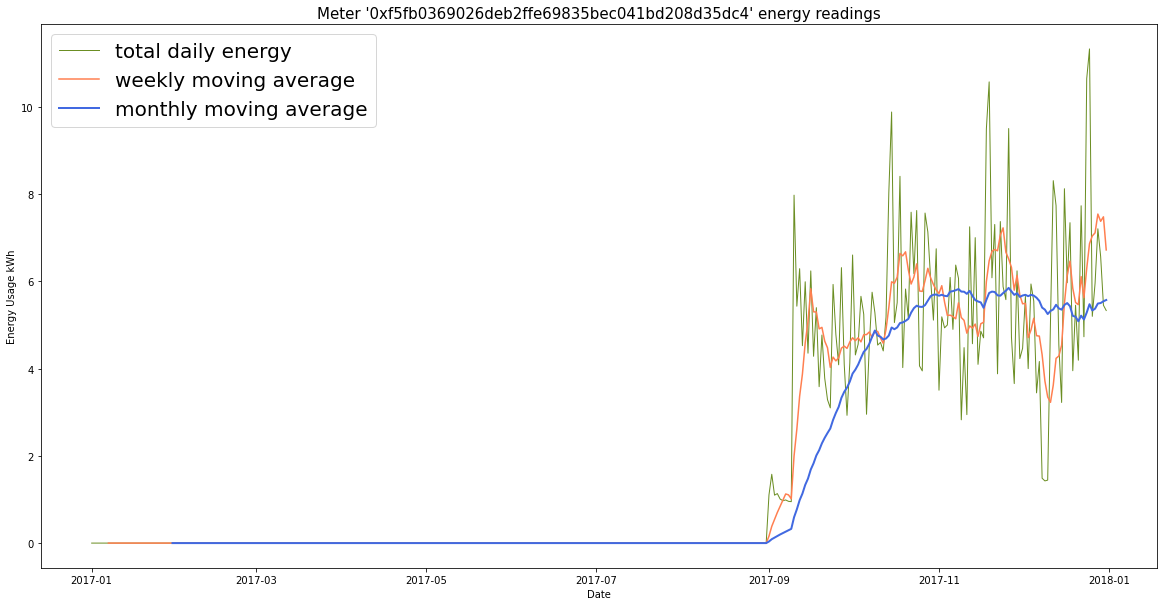

showing row:  2410


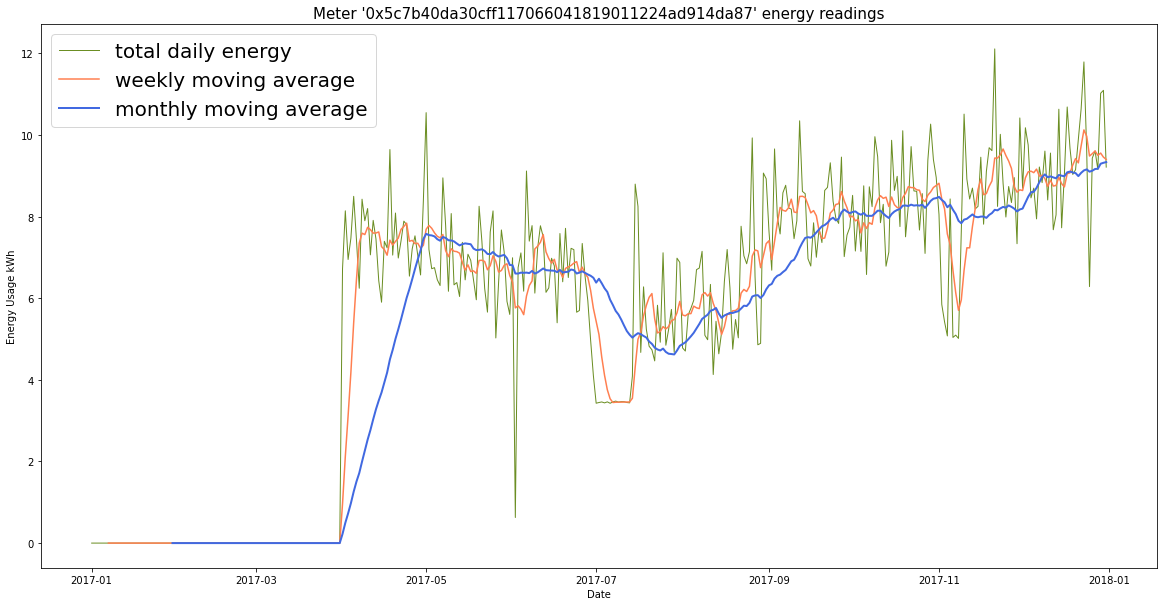

showing row:  2676


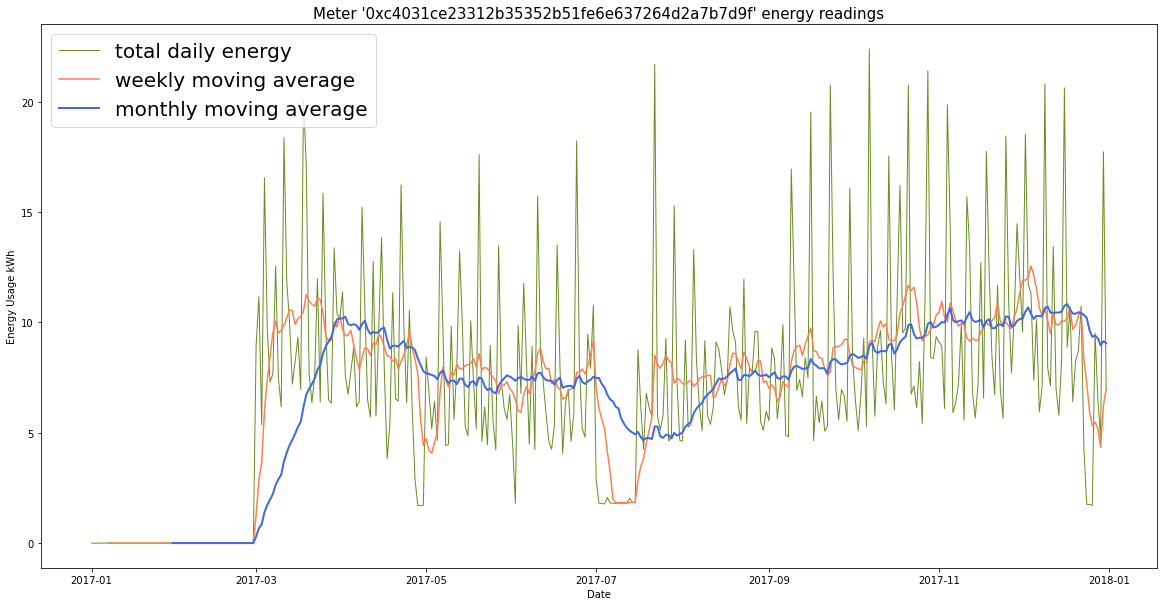

showing row:  2680


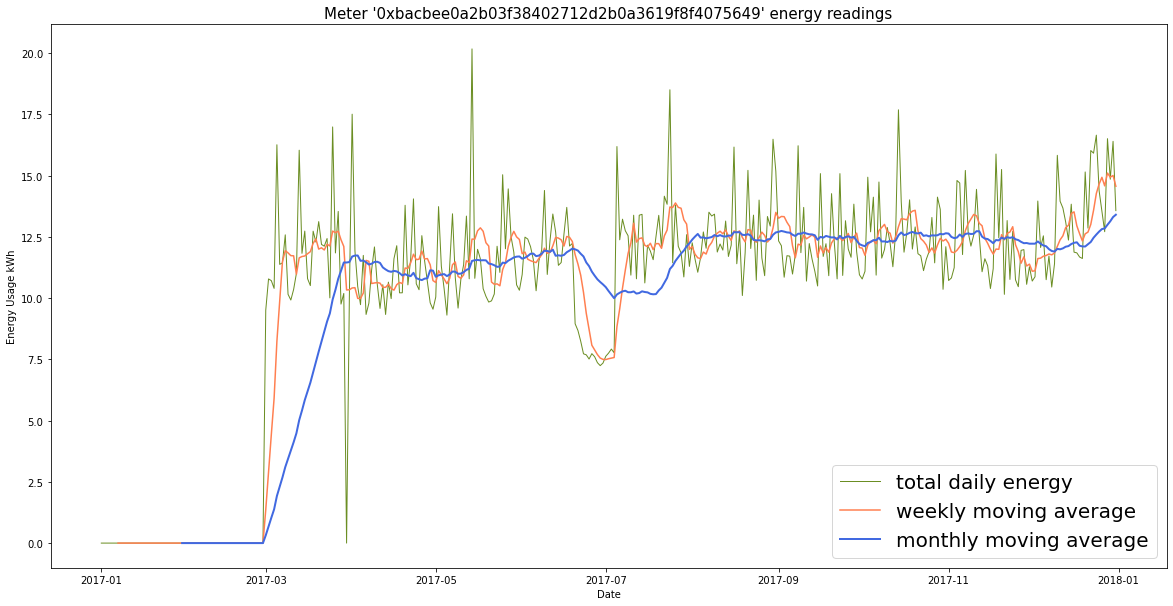

showing row:  2965


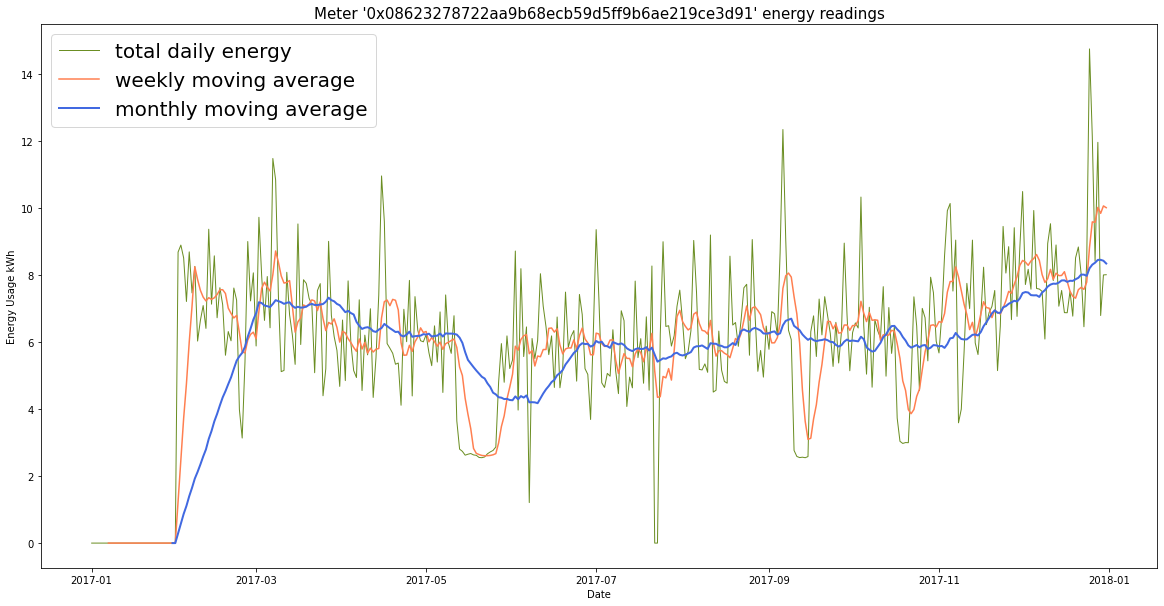

showing row:  3158


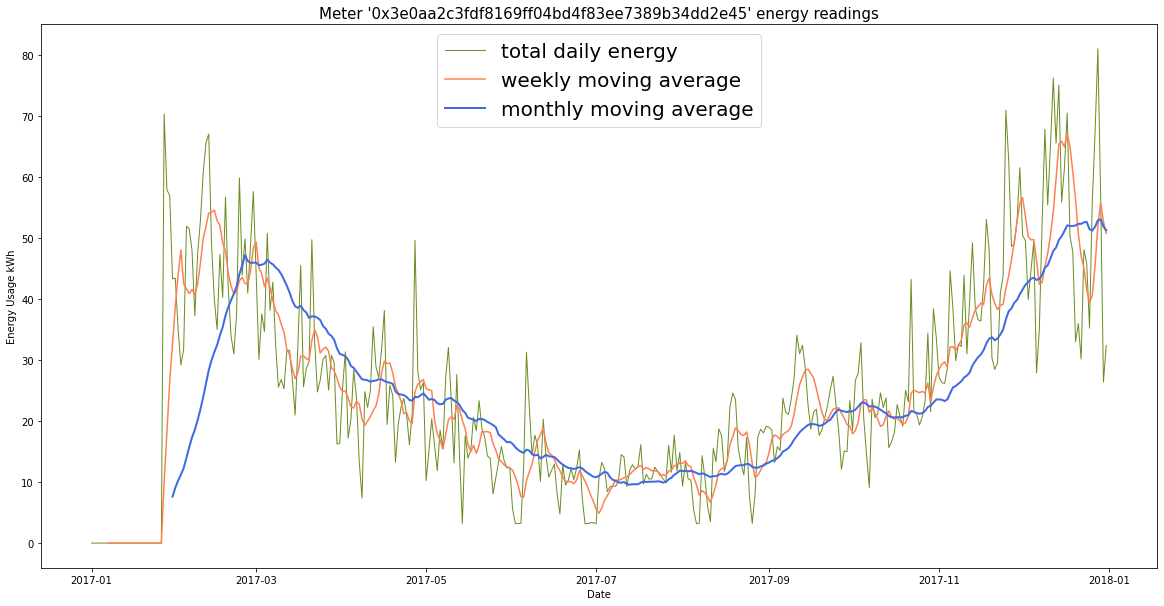

In [631]:
#plotting the uninterpolated data
plot_time_patterns(df_energy_daily, "", display_pid)

  0%|          | 0/3248 [00:00<?, ?it/s]

showing row:  849


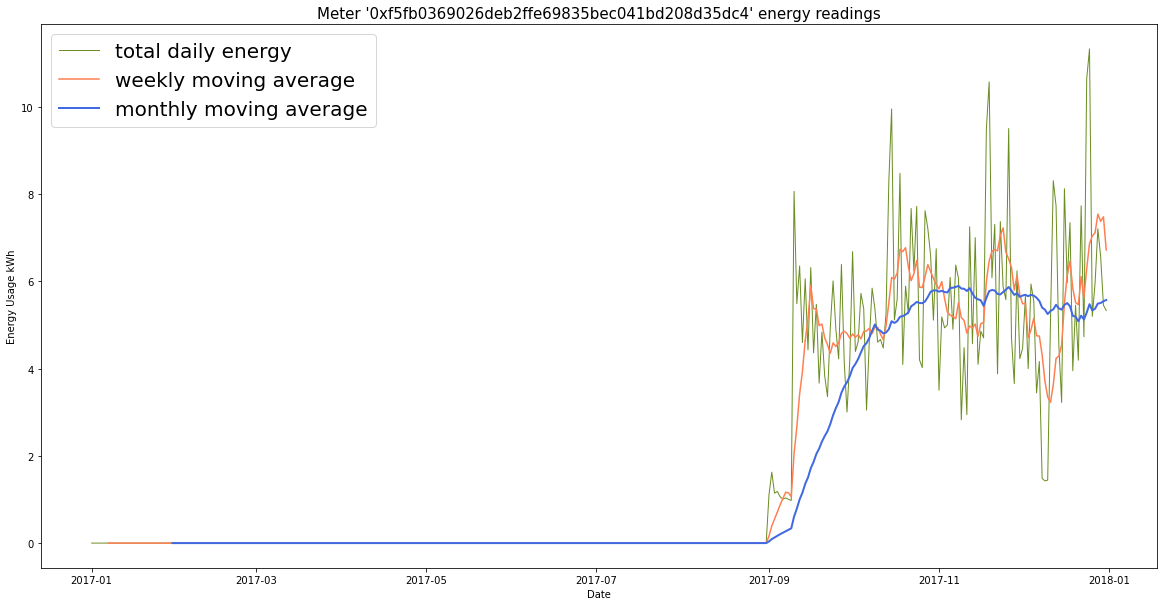

showing row:  2410


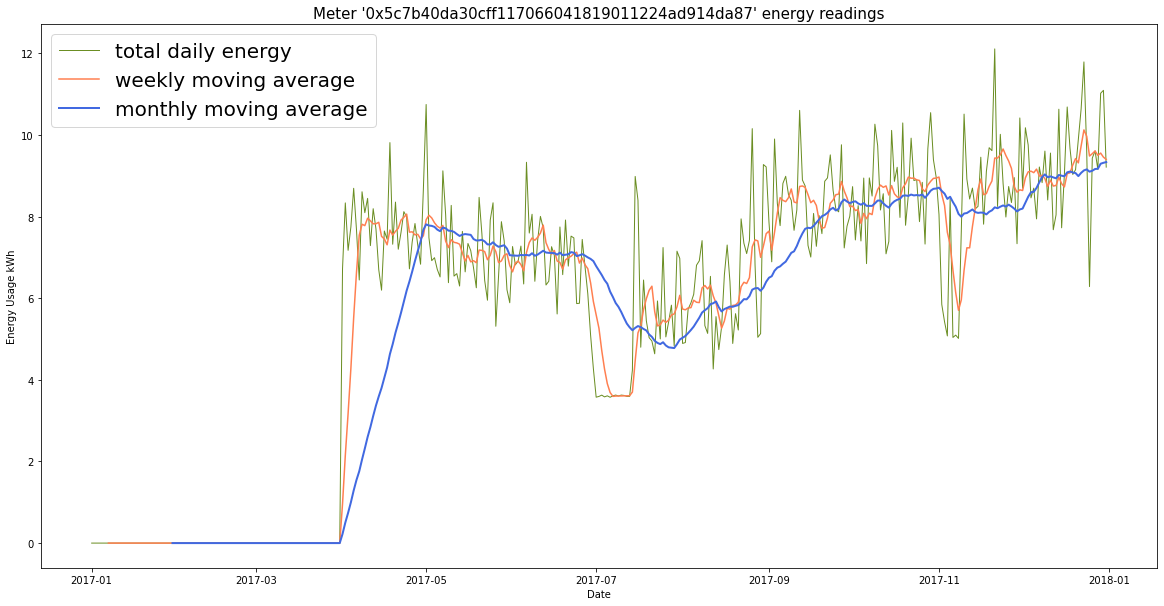

showing row:  2676


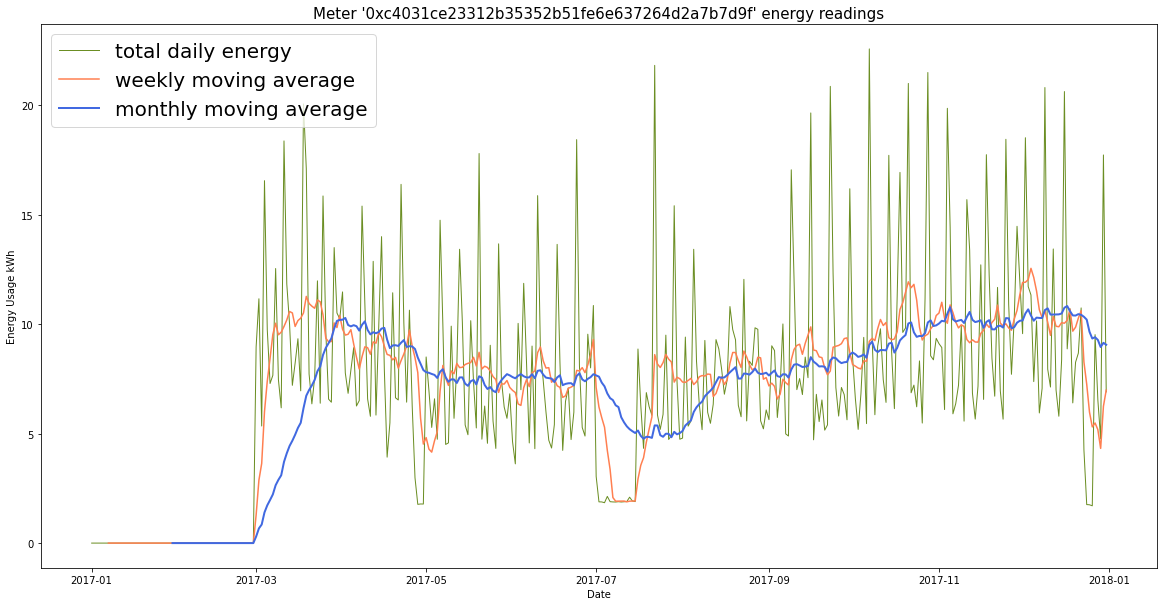

showing row:  2680


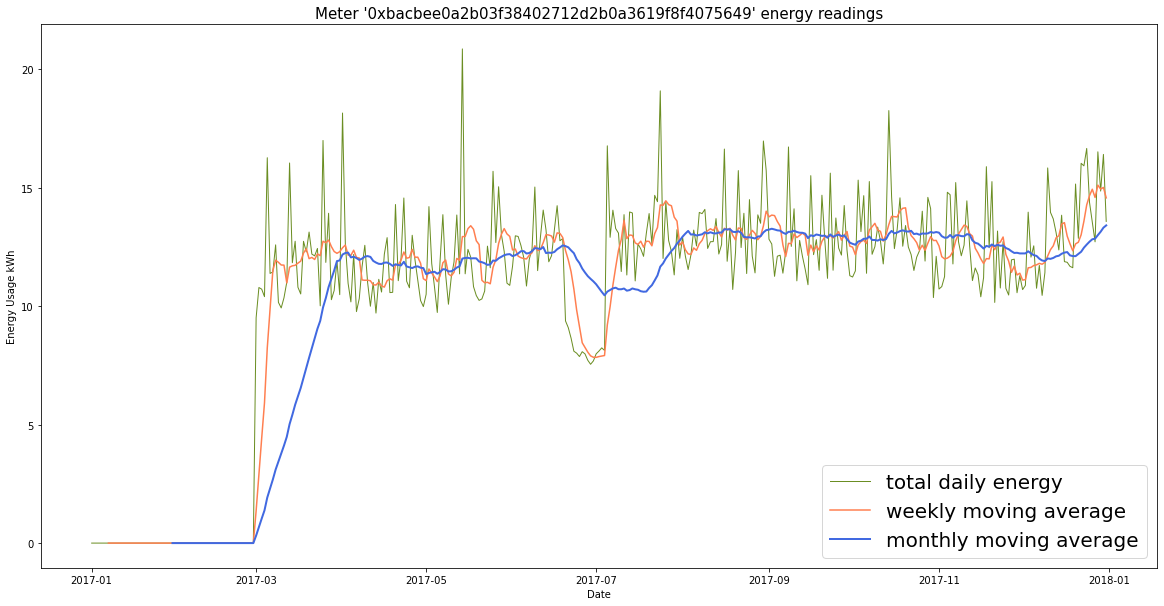

showing row:  2965


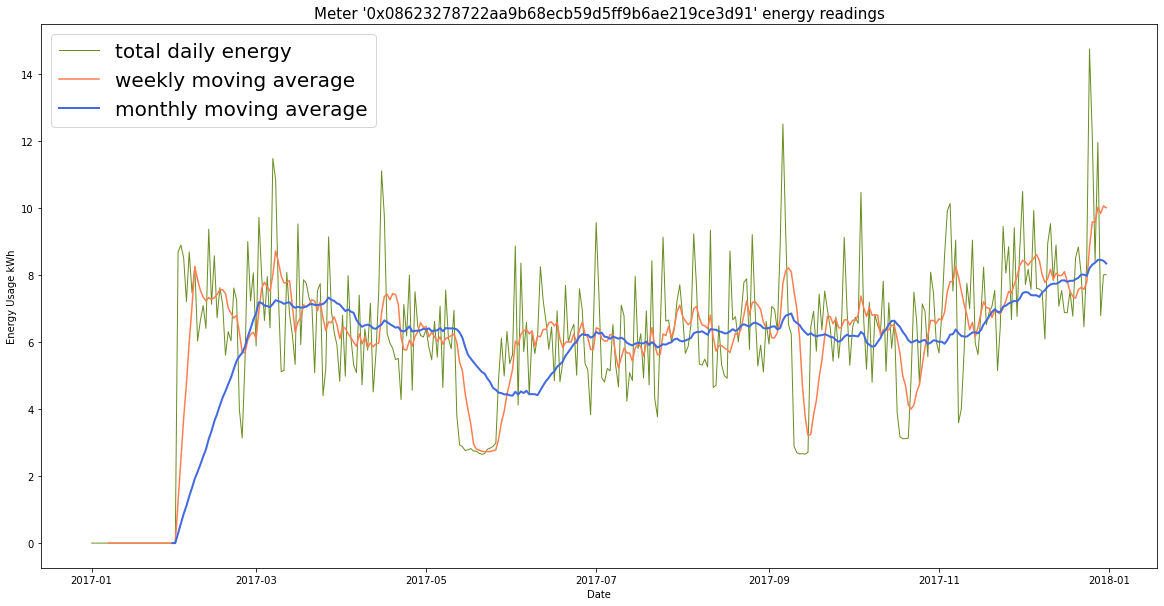

showing row:  3158


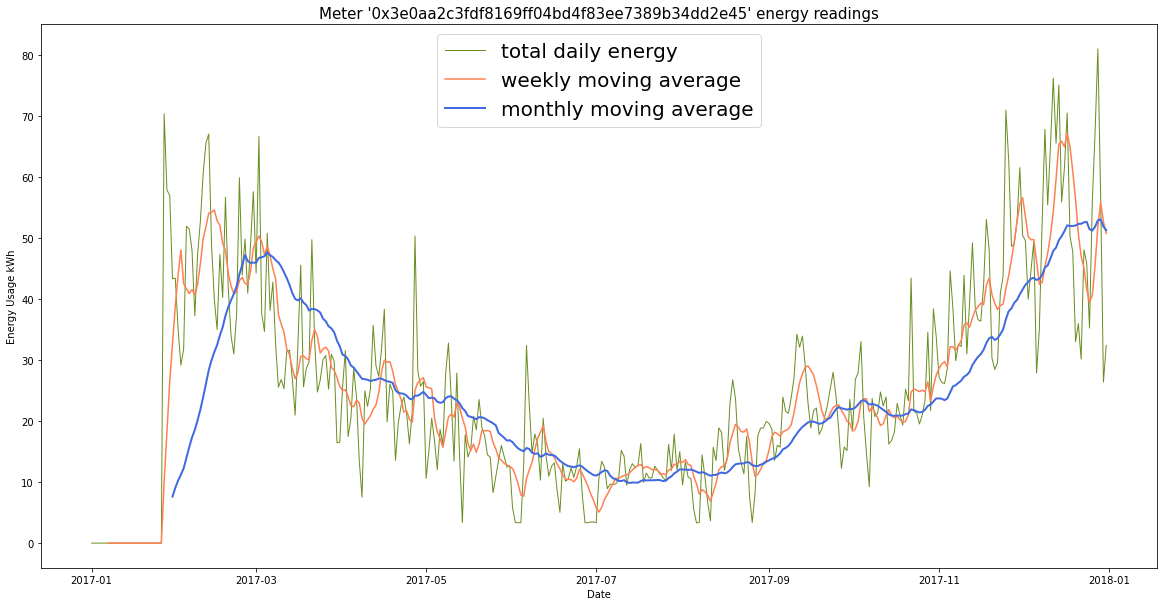

In [639]:
#plotting the original interpolated data
plot_time_patterns(df_energy_interpolate_original.fillna(0), "interpolated/", display_pid)

  0%|          | 0/3248 [00:00<?, ?it/s]

showing row:  849


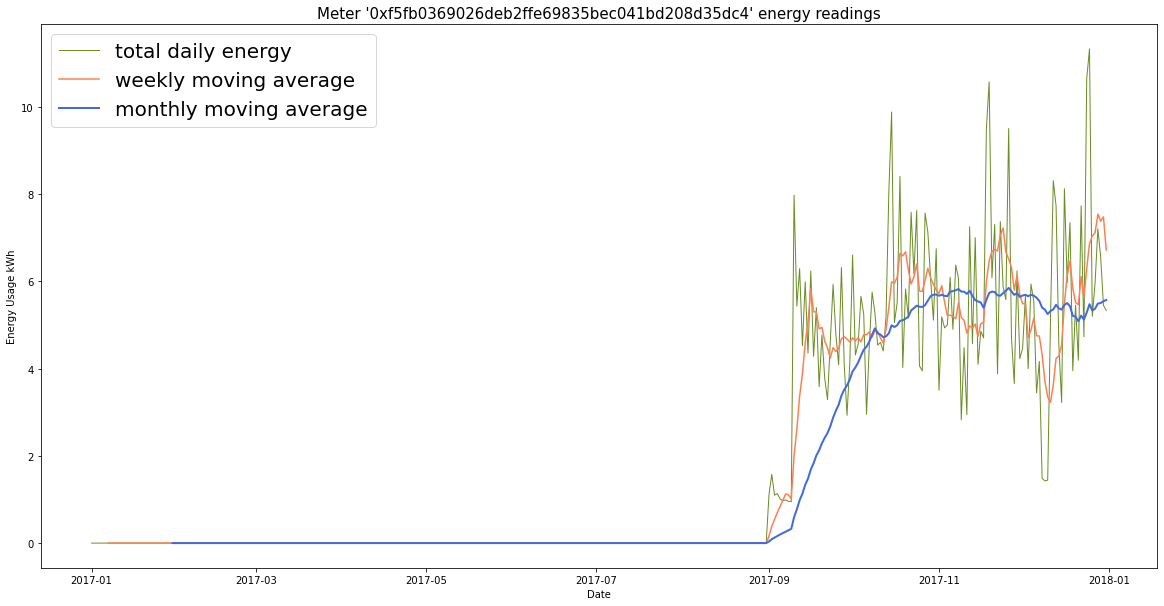

showing row:  2410


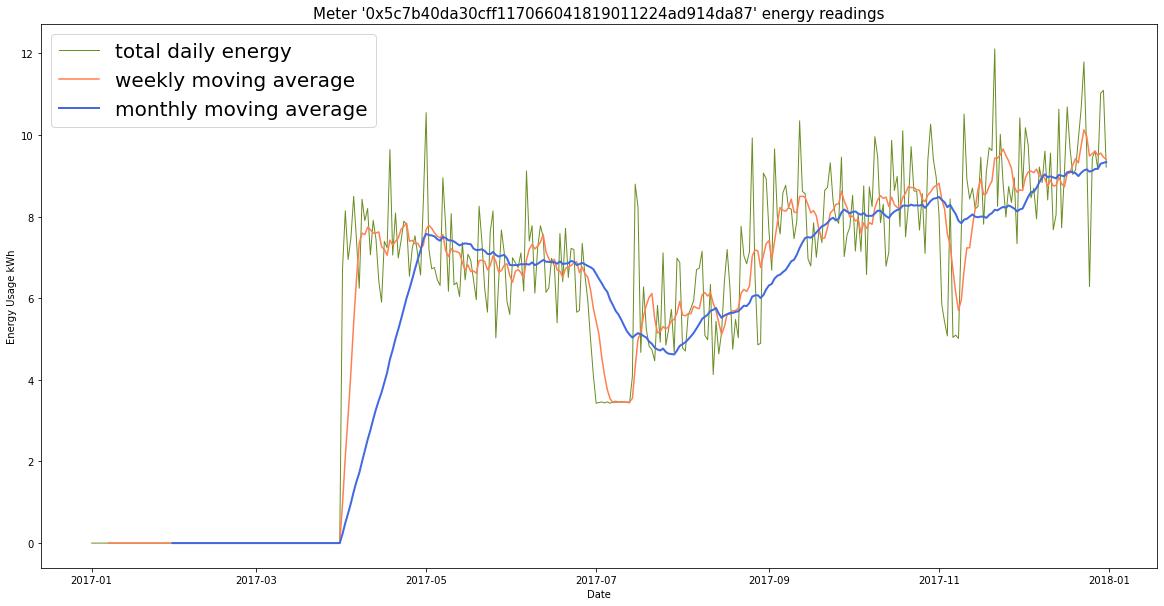

showing row:  2676


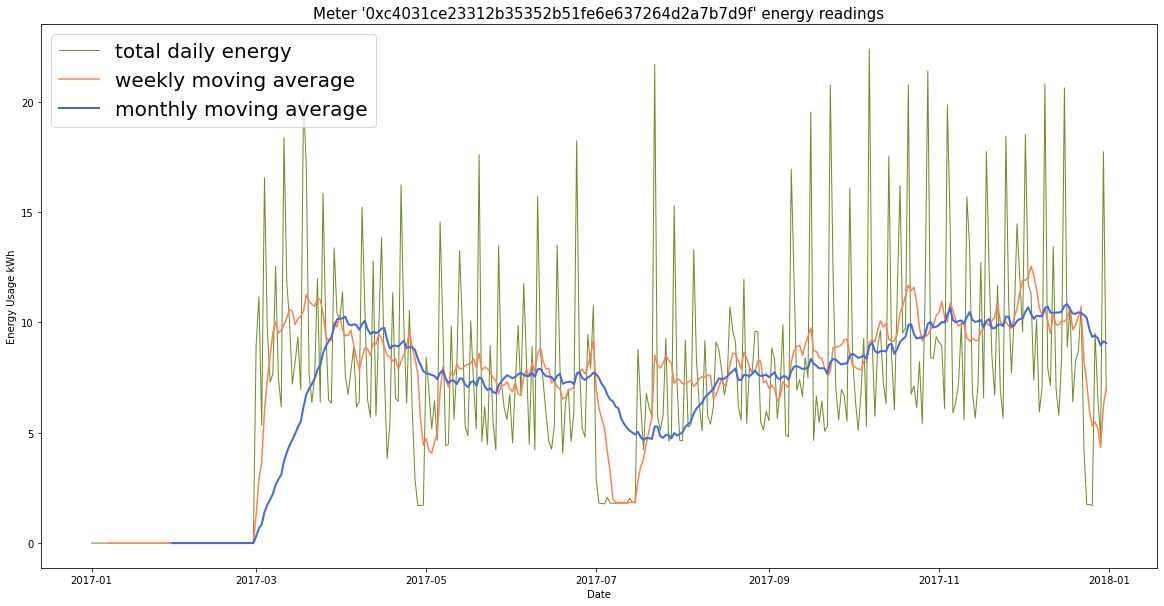

showing row:  2680


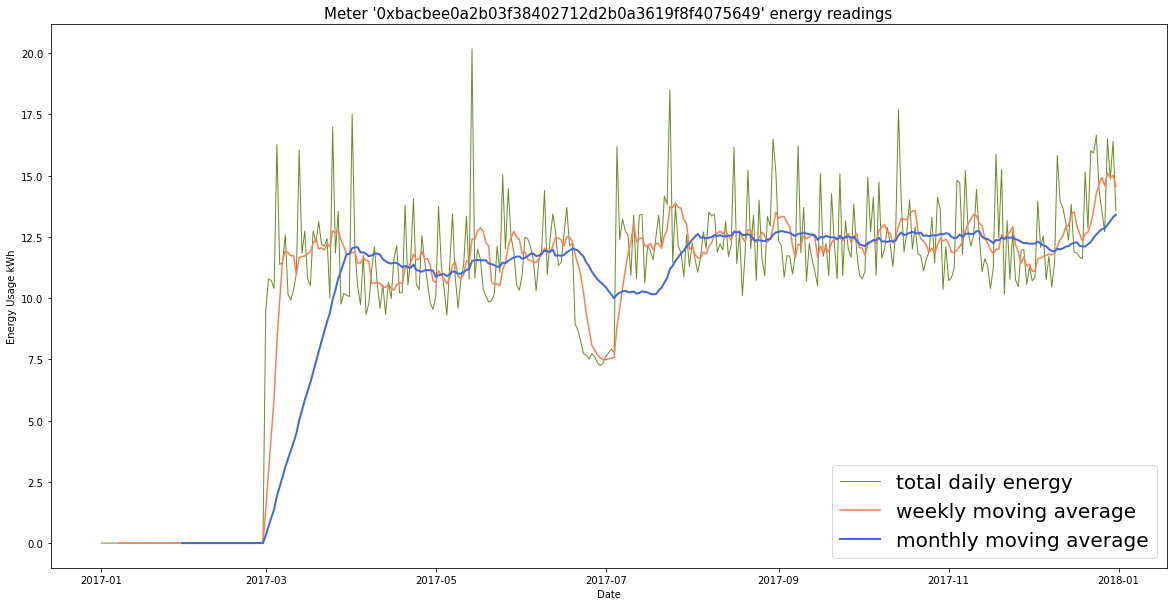

showing row:  2965


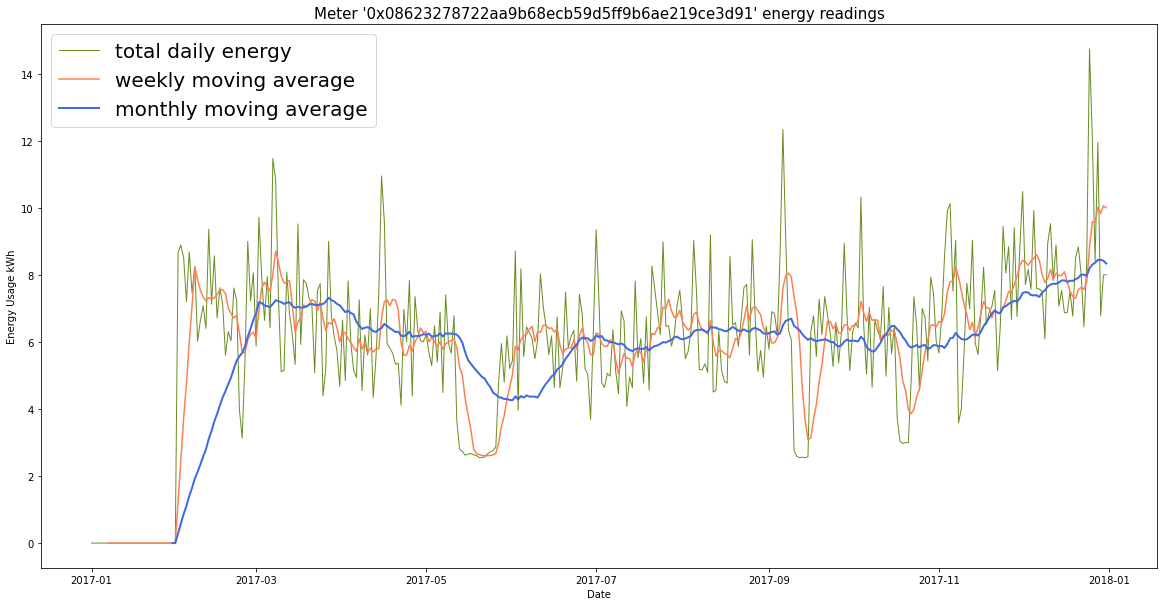

showing row:  3158


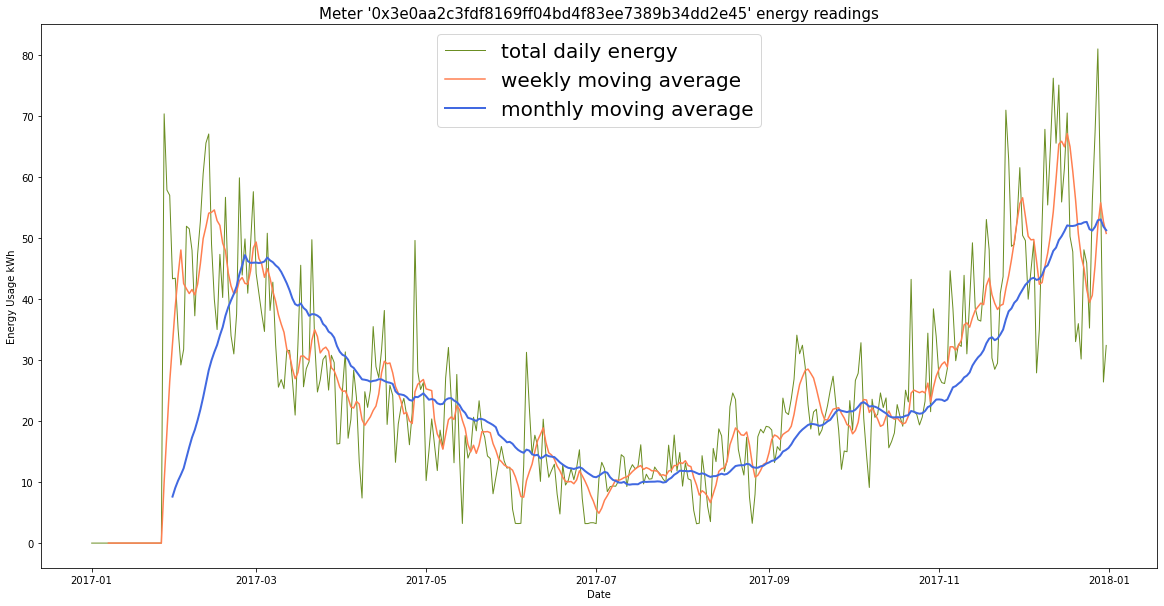

In [634]:
#plotting the smarter interpolated data
plot_time_patterns(df_energy_interpolated_better_interpolated.fillna(0), "Interpolated_Better/", display_pid)

## Calculating monthly averages (not sure if needed or not so commented out; may be worth using as another column after preparing data for time series?)

In [126]:
"""#resampling into months
df_energy_month = pd.DataFrame(columns=["meter_id"])
df_energy_month["meter_id"] = meter_id

#for each month in the range of dates
for month_i in tqdm(pd.date_range(datetime(2017, 1, 1), datetime(2017, 12, 31), freq = "M")):
    #going to give column name middle of month temporarily for ease of plotting, then will remove
    middle_of_month = str(month_i.replace(day=1)+(month_i-month_i.replace(day=1))/2)
    
    #get this months name as a string
    monthName = str(month_i.date())[:7]
    #get all columns that relate to this months
    col_month_i = [i for i in df_energy_daily.columns.values[1:] if i.startswith(monthName)]
    #sum these up into a monthly value
    df_energy_month[middle_of_month] = df_energy_daily[col_month_i].mean(axis=1) # midway through month so easier to plot"""

'#resampling into months\ndf_energy_month = pd.DataFrame(columns=["meter_id"])\ndf_energy_month["meter_id"] = meter_id\n\n#for each month in the range of dates\nfor month_i in tqdm(pd.date_range(datetime(2017, 1, 1), datetime(2017, 12, 31), freq = "M")):\n    #going to give column name middle of month temporarily for ease of plotting, then will remove\n    middle_of_month = str(month_i.replace(day=1)+(month_i-month_i.replace(day=1))/2)\n    \n    #get this months name as a string\n    monthName = str(month_i.date())[:7]\n    #get all columns that relate to this months\n    col_month_i = [i for i in df_energy_daily.columns.values[1:] if i.startswith(monthName)]\n    #sum these up into a monthly value\n    df_energy_month[middle_of_month] = df_energy_daily[col_month_i].mean(axis=1) # midway through month so easier to plot'

#### Conclusions:
* Have removed the missing values that could be removed via linear interpolation:
    * when there are values before and after the sequence of ?
* Still have lots of missing values at start and end of dataset

____________________________
____________________________
__________________
__________________________________
____________________________
__________________
__________________________________
____________________________
______________________________________________
__________________
__________________________________
____________________________
__________________
__________________________________
____________________________
______________________________________________
__________________
__________________________________
____________________________
__________________
__________________________________
____________________________
____________________________________________________
____________________________
__________________
__________________________________
____________________________
__________________
__________________________________
____________________________
____________________________________
__________________________________
____________________________
__________________
__________________________________
____________________________
______________________________________________
__________________
__________________________________
____________________________
__________________
__________________________________
____________________________
______________________________________________
__________________
__________________________________
____________________________
__________________
__________________________________
____________________________
____________________________________________________
____________________________
__________________
__________________________________
____________________________
__________________
__________________________________
____________________________
__________________

# EDA on AddInfo
## Adding missing rows to AddInfo based on missing meter_id's

In [127]:
# first making both dataframes alphabetical in order of meter_id for ease of comparison
df_info.sort_values('meter_id')

meter_id        dwelling_type  \
750   0x000f697092696c27b0bb489ea4c11280ef72ab82       detached_house   
88    0x001d6227832325ab6167b82d6d7175d254f57c3a  semi_detached_house   
1643  0x005958406351bb29580475df698b5f1070096397       detached_house   
694   0x00735e1aa83d97d9209cce47d8777b4ff3cc0554       terraced_house   
2056  0x0079fa6c2cbd3de97c8aa6073ff365b41ee087ab       terraced_house   
...                                          ...                  ...   
1922  0xffb4c5014834a46d09d0092e748c1ef5acd8733f  semi_detached_house   
1463  0xffbdc1d9209f45668fb0be65b6d50cb999890ccb                  NaN   
1685  0xffcbcdc7c3ce3451252b84c2aaf6f40d652d16d5       detached_house   
441   0xffe91f021d145e1560fcad8c3af5ac0ef9d76a02                  NaN   
2119  0xfff895258c21f1a58fc06538173d02b621021ad4                 flat   

      num_occupants  num_bedrooms heating_fuel hot_water_fuel boiler_age  \
750             NaN           4.0          NaN            NaN        NaN   
88              NaN           3.0          NaN            NaN        NaN   
1643            NaN           4.0          NaN            NaN        NaN   
694             NaN           3.0          NaN            NaN        NaN   
2056            NaN           3.0          NaN            NaN        NaN   
...             ...           ...          ...            ...        ...   
1922            NaN           3.0          NaN            NaN        NaN   
1463            NaN           3.0          NaN            NaN        NaN   
1685            NaN           3.0          NaN            NaN        NaN   
441             NaN           3.0          NaN            NaN        NaN   
2119            NaN           3.0          NaN            NaN        NaN   

     loft_insulation wall_insulation heating_temperature  \
750              NaN             NaN                 NaN   
88               NaN             NaN                 NaN   
1643             NaN             NaN                 NaN   
694              NaN             NaN                 NaN   
2056             NaN             NaN                 NaN   
...              ...             ...                 ...   
1922             NaN             NaN                 NaN   
1463             NaN             NaN                 NaN   
1685             NaN             NaN                 NaN   
441              NaN             NaN                 NaN   
2119             NaN             NaN                 NaN   

     efficient_lighting_percentage  dishwasher  freezer  fridge_freezer  \
750                            NaN         NaN      NaN             NaN   
88                             NaN         NaN      NaN             NaN   
1643                           NaN         NaN      NaN             NaN   
694                            NaN         NaN      NaN             NaN   
2056                           NaN         NaN      NaN             NaN   
...                            ...         ...      ...             ...   
1922                           NaN         NaN      NaN             NaN   
1463                           NaN         NaN      NaN             NaN   
1685                           NaN         NaN      NaN             NaN   
441                            NaN         NaN      NaN             NaN   
2119                           NaN         NaN      NaN             NaN   

      refrigerator  tumble_dryer  washing_machine  game_console  laptop  pc  \
750            NaN           NaN              NaN           NaN     NaN NaN   
88             NaN           NaN              NaN           NaN     NaN NaN   
1643           NaN           NaN              NaN           NaN     NaN NaN   
694            NaN           NaN              NaN           NaN     NaN NaN   
2056           NaN           NaN              NaN           NaN     NaN NaN   
...            ...           ...              ...           ...     ...  ..   
1922           NaN           NaN              NaN           NaN     NaN NaN

In [128]:
df_energy.sort_values('meter_id')

meter_id  2017-01-01 00:00:00  \
1124  0x0001f1c389823f953b2eaee0a61c33539744da0c                  NaN   
602   0x000f697092696c27b0bb489ea4c11280ef72ab82                  NaN   
972   0x0019979ee12c59accd24d1c83291528ced1bb734                  NaN   
356   0x001d6227832325ab6167b82d6d7175d254f57c3a                  NaN   
133   0x005958406351bb29580475df698b5f1070096397                  NaN   
...                                          ...                  ...   
1231  0xffb4c5014834a46d09d0092e748c1ef5acd8733f                  NaN   
2580  0xffbdc1d9209f45668fb0be65b6d50cb999890ccb                  NaN   
2198  0xffcbcdc7c3ce3451252b84c2aaf6f40d652d16d5                  NaN   
2792  0xffe91f021d145e1560fcad8c3af5ac0ef9d76a02                  NaN   
3098  0xfff895258c21f1a58fc06538173d02b621021ad4                0.094   

      2017-01-01 00:30:00  2017-01-01 01:00:00  2017-01-01 01:30:00  \
1124                  NaN                  NaN                  NaN   
602                   NaN                  NaN                  NaN   
972                   NaN                  NaN                  NaN   
356                   NaN                  NaN                  NaN   
133                   NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
1231                  NaN                  NaN                  NaN   
2580                  NaN                  NaN                  NaN   
2198                  NaN                  NaN                  NaN   
2792                  NaN                  NaN                  NaN   
3098                0.093                0.094                0.089   

      2017-01-01 02:00:00  2017-01-01 02:30:00  2017-01-01 03:00:00  \
1124                  NaN                  NaN                  NaN   
602                   NaN                  NaN                  NaN   
972                   NaN                  NaN                  NaN   
356                   NaN                  NaN                  NaN   
133                   NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
1231                  NaN                  NaN                  NaN   
2580                  NaN                  NaN                  NaN   
2198                  NaN                  NaN                  NaN   
2792                  NaN                  NaN                  NaN   
3098                0.091                  0.1                 0.09   

      2017-01-01 03:30:00  2017-01-01 04:00:00  2017-01-01 04:30:00  \
1124                  NaN                  NaN                  NaN   
602                   NaN                  NaN                  NaN   
972                   NaN                  NaN                  NaN   
356                   NaN                  NaN                  NaN   
133                   NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
1231                  NaN                  NaN                  NaN   
2580                  NaN                  NaN                  NaN   
2198                  NaN                  NaN                  NaN   
2792                  NaN                  NaN                  NaN   
3098                0.088                0.088                0.099   

      2017-01-01 05:00:00  2017-01-01 05:30:00  2017-01-01 06:00:00  \
1124                  NaN                  NaN                  NaN   
602                   NaN                  NaN                  NaN   
972                   NaN                  NaN                  NaN   
356                   NaN                  NaN                  NaN   
133                   NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
1231                  NaN                  NaN                  NaN   
2580                  NaN           

In [129]:
#adding the missing meter rows to df_info
df_info_all_meters = pd.merge(df_info, df_energy["meter_id"], on="meter_id",how="outer")

In [130]:
#checking the values are correct now
df_info_all_meters.sort_values('meter_id')

meter_id        dwelling_type  \
2532  0x0001f1c389823f953b2eaee0a61c33539744da0c                  NaN   
750   0x000f697092696c27b0bb489ea4c11280ef72ab82       detached_house   
2468  0x0019979ee12c59accd24d1c83291528ced1bb734                  NaN   
88    0x001d6227832325ab6167b82d6d7175d254f57c3a  semi_detached_house   
1643  0x005958406351bb29580475df698b5f1070096397       detached_house   
...                                          ...                  ...   
1922  0xffb4c5014834a46d09d0092e748c1ef5acd8733f  semi_detached_house   
1463  0xffbdc1d9209f45668fb0be65b6d50cb999890ccb                  NaN   
1685  0xffcbcdc7c3ce3451252b84c2aaf6f40d652d16d5       detached_house   
441   0xffe91f021d145e1560fcad8c3af5ac0ef9d76a02                  NaN   
2119  0xfff895258c21f1a58fc06538173d02b621021ad4                 flat   

      num_occupants  num_bedrooms heating_fuel hot_water_fuel boiler_age  \
2532            NaN           NaN          NaN            NaN        NaN   
750             NaN           4.0          NaN            NaN        NaN   
2468            NaN           NaN          NaN            NaN        NaN   
88              NaN           3.0          NaN            NaN        NaN   
1643            NaN           4.0          NaN            NaN        NaN   
...             ...           ...          ...            ...        ...   
1922            NaN           3.0          NaN            NaN        NaN   
1463            NaN           3.0          NaN            NaN        NaN   
1685            NaN           3.0          NaN            NaN        NaN   
441             NaN           3.0          NaN            NaN        NaN   
2119            NaN           3.0          NaN            NaN        NaN   

     loft_insulation wall_insulation heating_temperature  \
2532             NaN             NaN                 NaN   
750              NaN             NaN                 NaN   
2468             NaN             NaN                 NaN   
88               NaN             NaN                 NaN   
1643             NaN             NaN                 NaN   
...              ...             ...                 ...   
1922             NaN             NaN                 NaN   
1463             NaN             NaN                 NaN   
1685             NaN             NaN                 NaN   
441              NaN             NaN                 NaN   
2119             NaN             NaN                 NaN   

     efficient_lighting_percentage  dishwasher  freezer  fridge_freezer  \
2532                           NaN         NaN      NaN             NaN   
750                            NaN         NaN      NaN             NaN   
2468                           NaN         NaN      NaN             NaN   
88                             NaN         NaN      NaN             NaN   
1643                           NaN         NaN      NaN             NaN   
...                            ...         ...      ...             ...   
1922                           NaN         NaN      NaN             NaN   
1463                           NaN         NaN      NaN             NaN   
1685                           NaN         NaN      NaN             NaN   
441                            NaN         NaN      NaN             NaN   
2119                           NaN         NaN      NaN             NaN   

      refrigerator  tumble_dryer  washing_machine  game_console  laptop  pc  \
2532           NaN           NaN              NaN           NaN     NaN NaN   
750            NaN           NaN              NaN           NaN     NaN NaN   
2468           NaN           NaN              NaN           NaN     NaN NaN   
88             NaN           NaN              NaN           NaN     NaN NaN   
1643           NaN           NaN              NaN           NaN     NaN NaN   
...            ...           ...              ...           ...     ...  ..   
1922           NaN           NaN              NaN           NaN     NaN NaN

In [131]:
#checking the shape is correct now
df_info_all_meters.shape

(3248, 24)

## Exploring datatypes and unique values

In [132]:
# inspecting the types of each column
df_info_all_meters.dtypes

meter_id                          object
dwelling_type                     object
num_occupants                    float64
num_bedrooms                     float64
heating_fuel                      object
hot_water_fuel                    object
boiler_age                        object
loft_insulation                   object
wall_insulation                   object
heating_temperature               object
efficient_lighting_percentage     object
dishwasher                       float64
freezer                          float64
fridge_freezer                   float64
refrigerator                     float64
tumble_dryer                     float64
washing_machine                  float64
game_console                     float64
laptop                           float64
pc                               float64
router                           float64
set_top_box                      float64
tablet                           float64
tv                               float64
dtype: object

In [133]:
#looking at the unique values for each column
for column in df_info_all_meters.drop(["meter_id"],axis=1).columns:
    print(column+" unique value count: "+str(df_info_all_meters[column].nunique()))
    print(df_info_all_meters[column].unique())
    print()

dwelling_type unique value count: 5
['semi_detached_house' 'terraced_house' 'detached_house' nan 'bungalow'
 'flat']

num_occupants unique value count: 4
[nan  2.  4.  3.  1.]

num_bedrooms unique value count: 5
[ 3.  2. nan  4.  5.  1.]

heating_fuel unique value count: 4
[nan 'gas' 'elec' 'other' 'lpg_oil']

hot_water_fuel unique value count: 3
[nan 'gas' 'elec' 'other']

boiler_age unique value count: 2
[nan 'new' 'old']

loft_insulation unique value count: 2
[nan 'y' 'n']

wall_insulation unique value count: 5
[nan 'y_cavity' 'n' 'y_internal' 'not_sure' 'y_external']

heating_temperature unique value count: 4
[nan '18_to_20' 'above_20' 'below_18' 'not_sure']

efficient_lighting_percentage unique value count: 4
[nan '0_to_25' '25_to_50' '50_to_75' '75_to_100']

dishwasher unique value count: 3
[nan  1.  0.  2.]

freezer unique value count: 3
[nan  2.  1.  0.]

fridge_freezer unique value count: 3
[nan  2.  0.  1.]

refrigerator unique value count: 3
[nan  2.  1.  0.]

tumble_dryer u

* We now know:
    1. The columns that contain categorical values vs the columns that contain real numbers
    2. The unique values for each column
    
## Exploring missing values
### Visualising as histogram

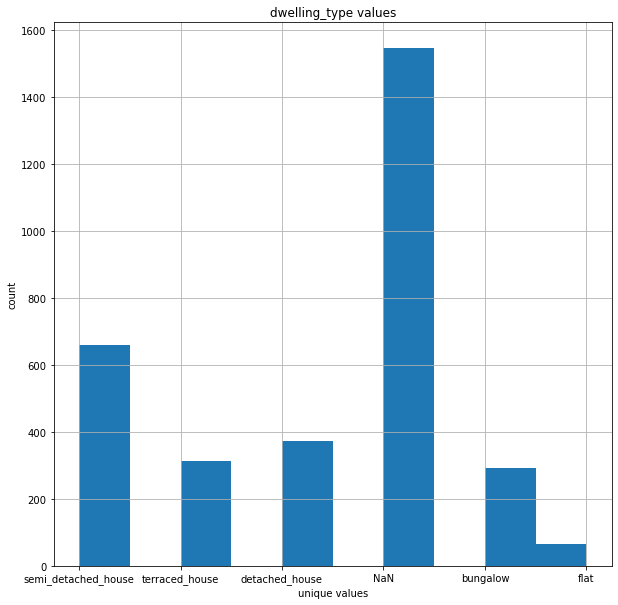

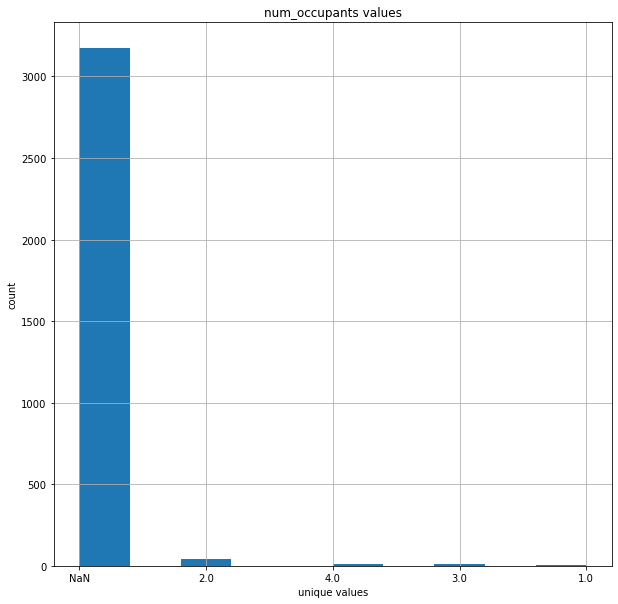

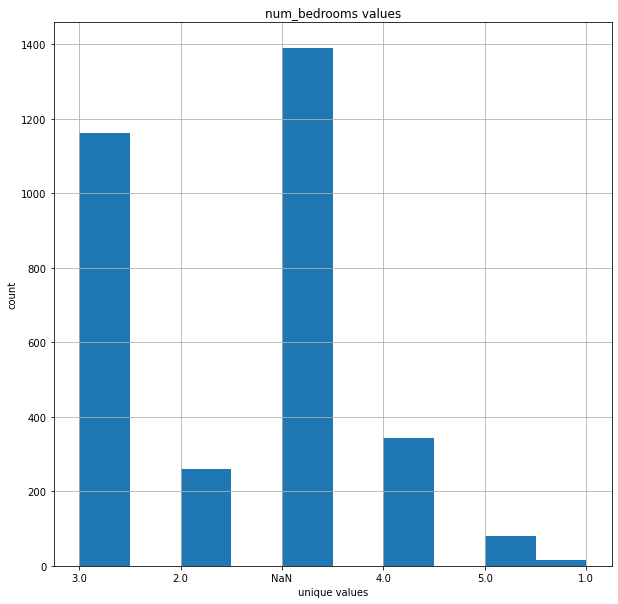

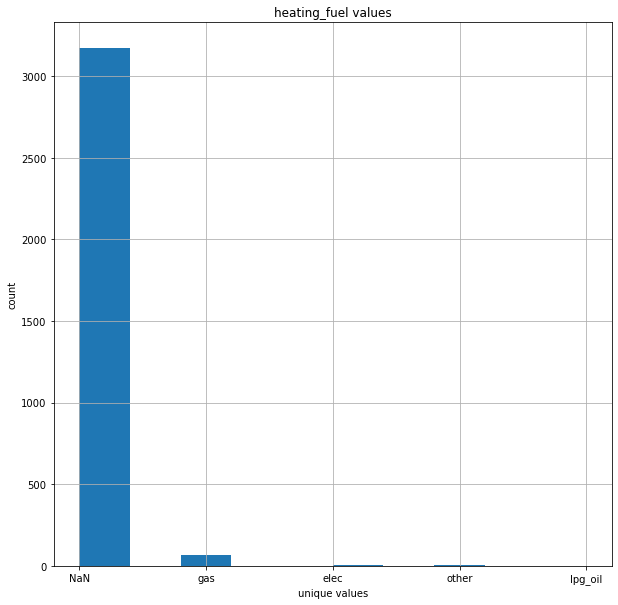

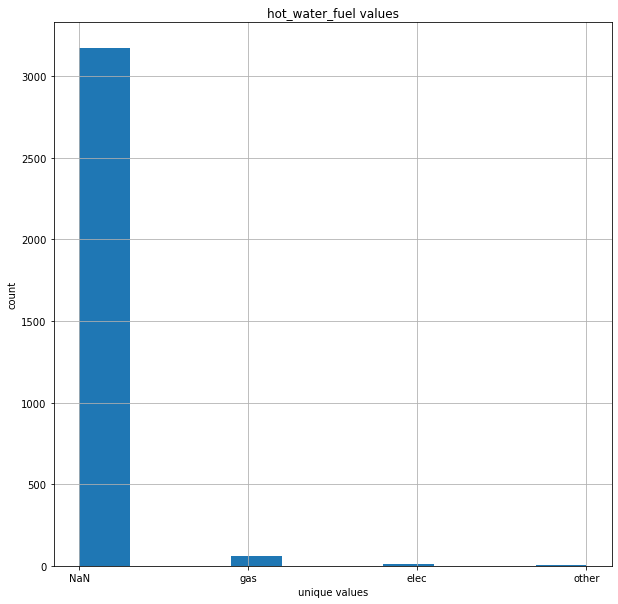

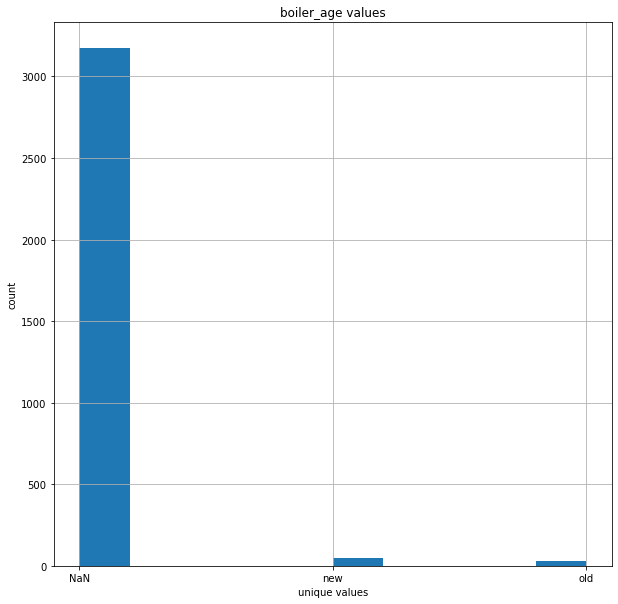

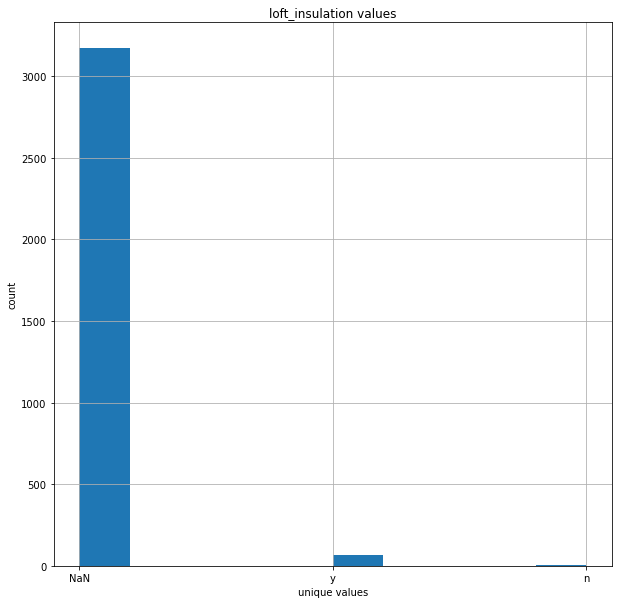

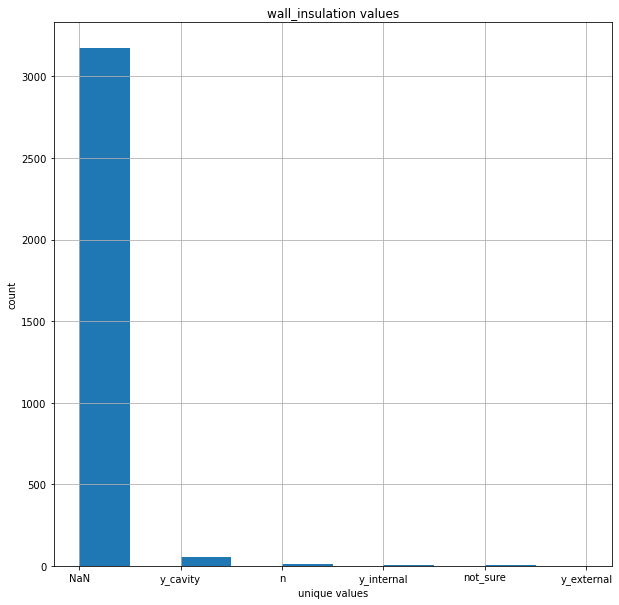

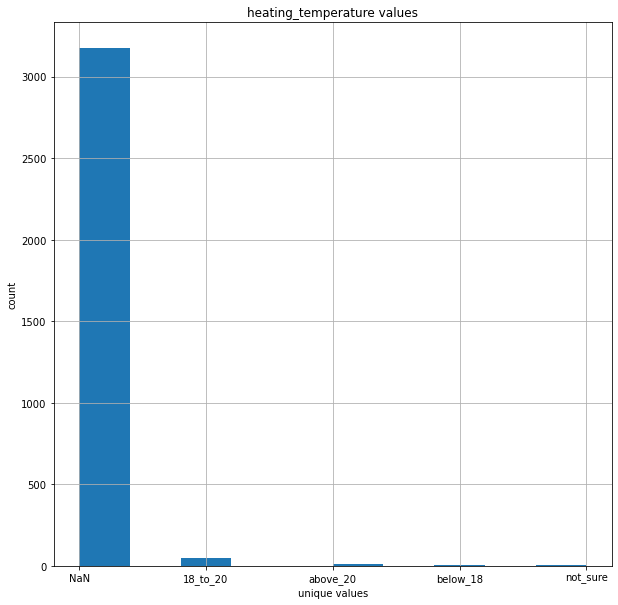

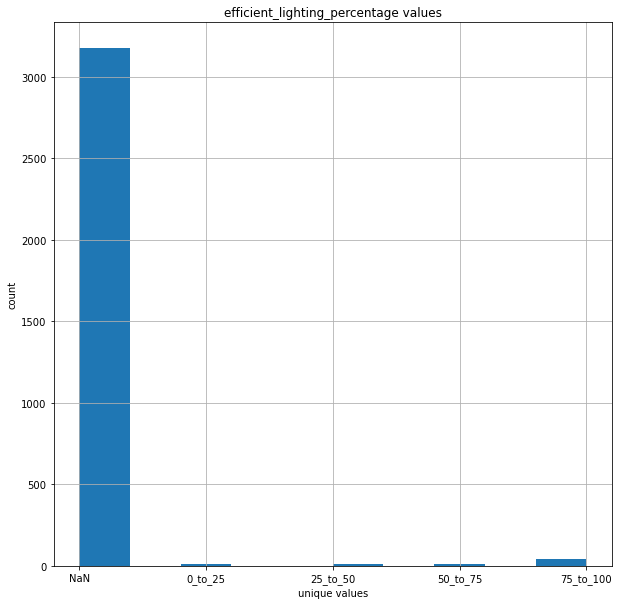

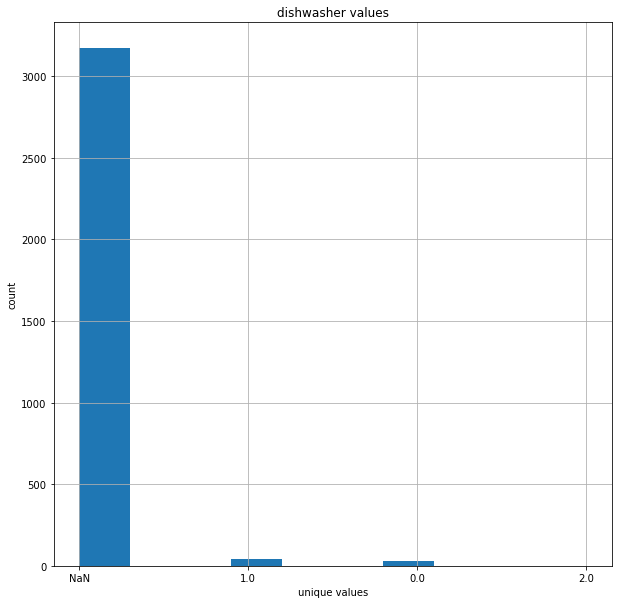

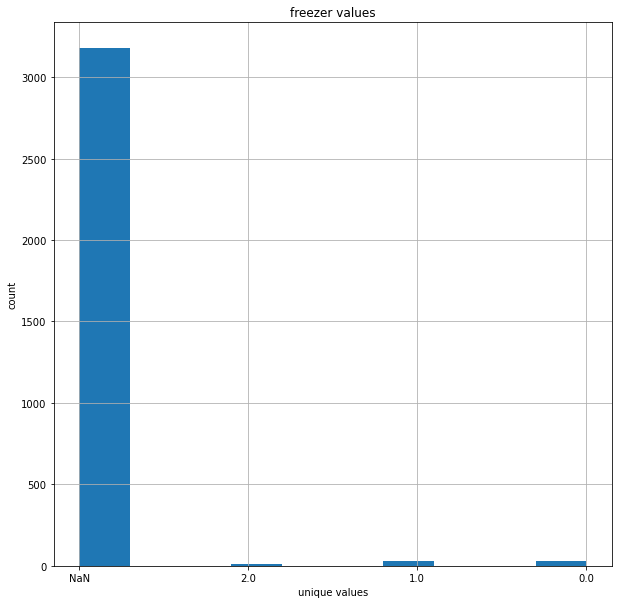

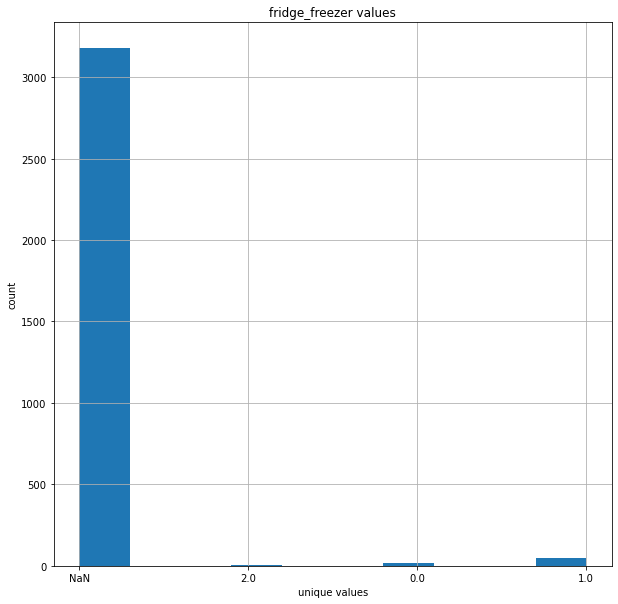

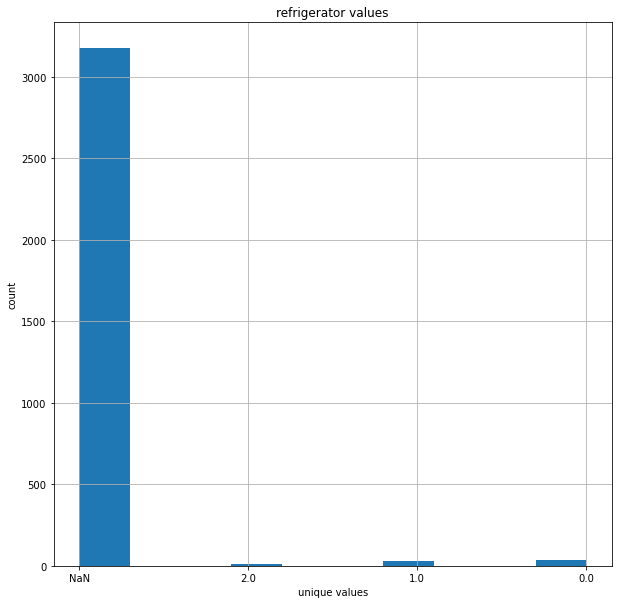

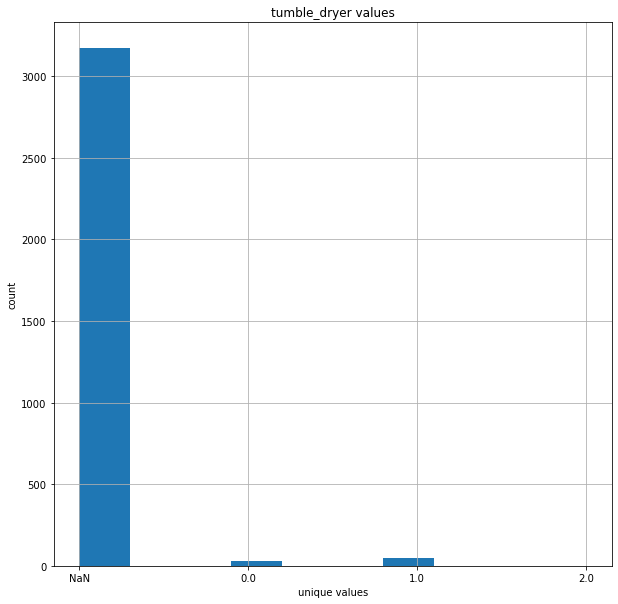

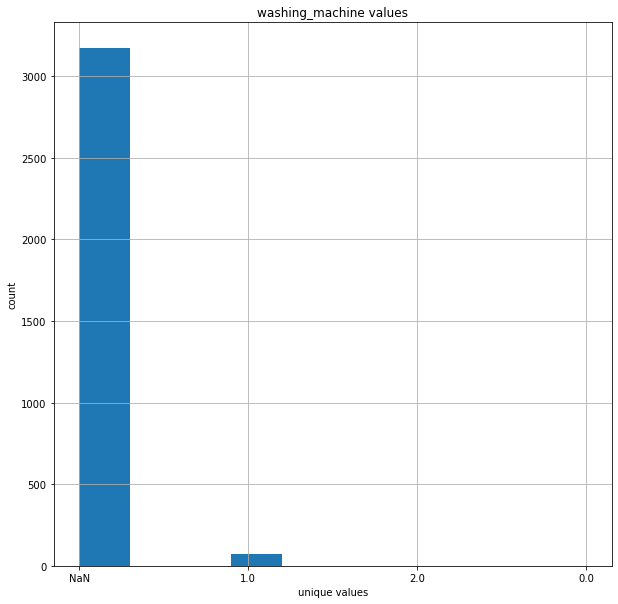

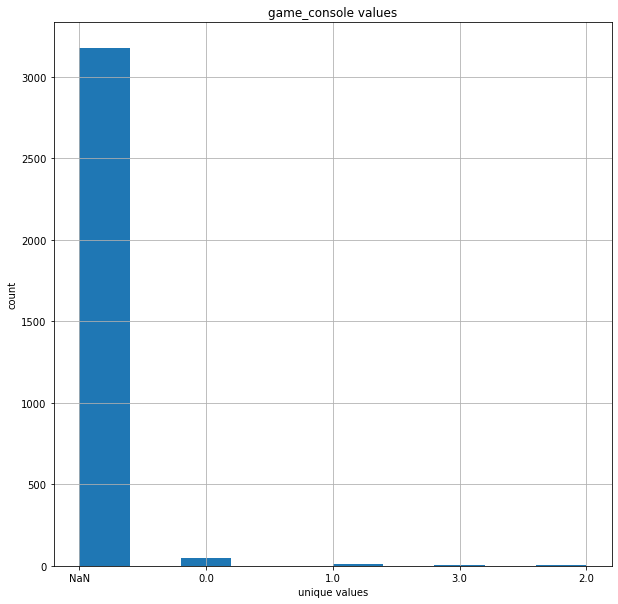

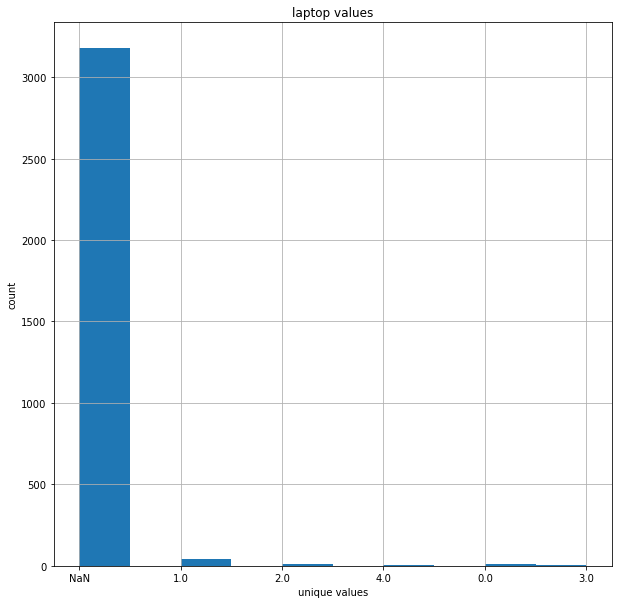

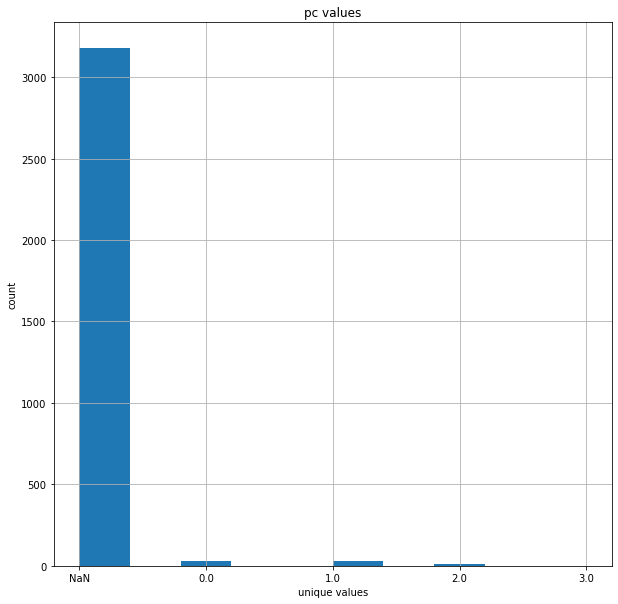

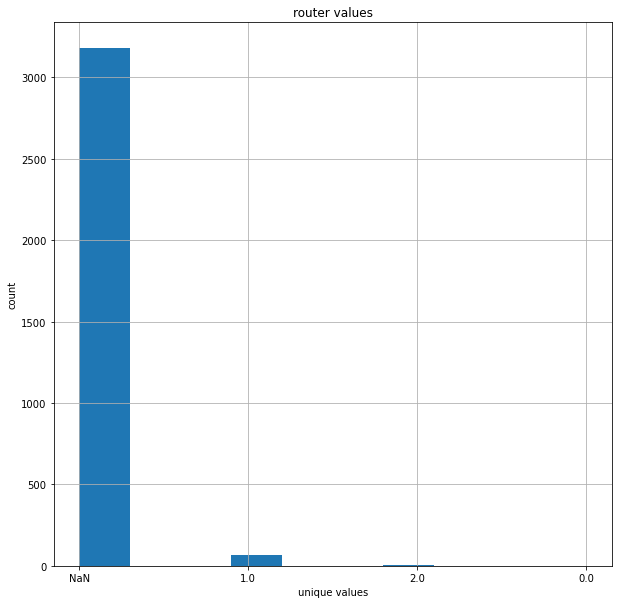

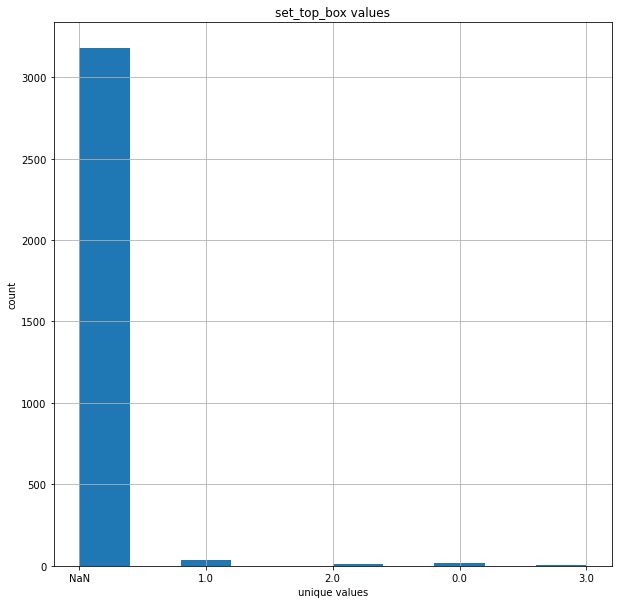

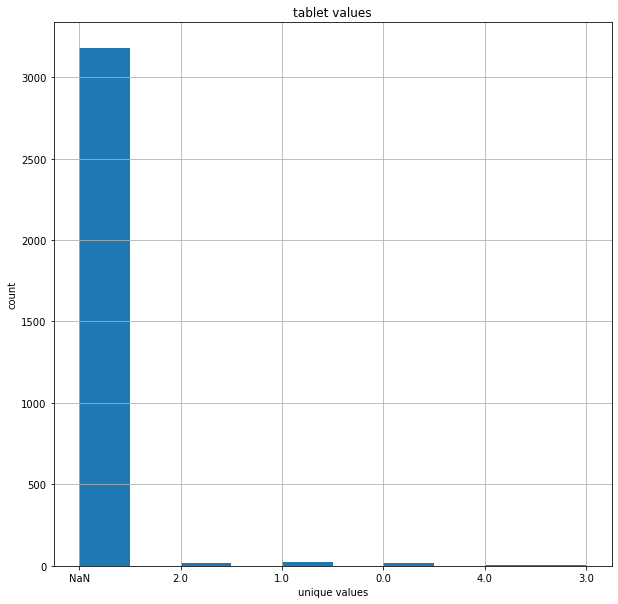

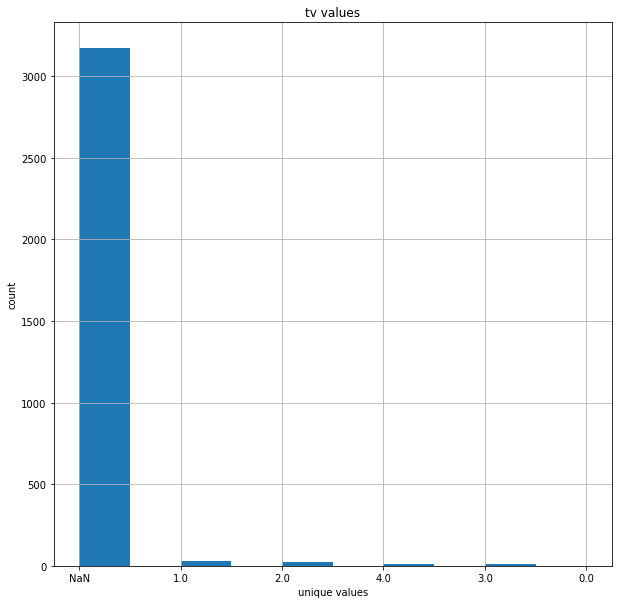

In [134]:
# plotting a histogram for each of the columns in the dataset
for column in df_info_all_meters.drop(["meter_id"],axis=1).columns:
    df_temp = df_info_all_meters[column].replace(np.nan,"NaN").apply(str)
    ax = df_temp.hist(figsize=(10,10))
    ax.set_xlabel("unique values")
    ax.set_ylabel("count")
    fig = ax.get_figure()
    plt.title(column+" values")
    plt.show(block=False)
    
    if(os.path.exists(f"../EDA/plots/addInfo/{column}_hist.png")==False):
        fig.savefig(f"../EDA/plots/addInfo/{column}_hist.png")
        
    plt.close(fig)

### Calculating percentage of missing values for each column

In [135]:
# Calculating percentage of missing values
#stores index of columns to keep: defaults all to true and will check which to make false
columns = np.full((df_info_all_meters.shape[1],), True, dtype=bool)

# getting the count of each object type in each column
for i in range(0,len(df_info_all_meters.columns)):
    column =df_info_all_meters.columns[i]
    #calculating the percentage of missing values
    percent_missing = df_info_all_meters[column].isnull().sum() * 100 / len(df_info_all_meters)
    print(column+" contains missing values: "+str(df_info_all_meters[column].isna().values.any()))
    print(column+" is missing: "+str(round(percent_missing,2))+"%")
    
    #if the percentage of missing values is greater than 50% mark them to be removed
    if(percent_missing>=50):
        print("Marked ",column,"for removal due to it having more than 50% missing values")
        columns[i] = False
    else:
        print("Not marked ",column,"for removal due to it not having more than 50% missing values")
    print()

meter_id contains missing values: False
meter_id is missing: 0.0%
Not marked  meter_id for removal due to it not having more than 50% missing values

dwelling_type contains missing values: True
dwelling_type is missing: 47.6%
Not marked  dwelling_type for removal due to it not having more than 50% missing values

num_occupants contains missing values: True
num_occupants is missing: 97.72%
Marked  num_occupants for removal due to it having more than 50% missing values

num_bedrooms contains missing values: True
num_bedrooms is missing: 42.76%
Not marked  num_bedrooms for removal due to it not having more than 50% missing values

heating_fuel contains missing values: True
heating_fuel is missing: 97.6%
Marked  heating_fuel for removal due to it having more than 50% missing values

hot_water_fuel contains missing values: True
hot_water_fuel is missing: 97.66%
Marked  hot_water_fuel for removal due to it having more than 50% missing values

boiler_age contains missing values: True
boiler_a

#### Meaning of findings;
* As the histograms and calculations show: there is a massive amount of missing values
* Marked all columns with > 50% missing values for removal
    * as if more than half of the values are missing it is likely what we do impute won't be accurate
* Need to decide what to do with the the remaining 2 as they have 40% missing values: is this good enough?
    * Will likely require experimentation:
        * So will run one model which only uses energy
        * And one that uses addInfo after the missing values have been imputed

## Removing the columns with greater than 50% missing values

In [136]:
# Removing the columns marked for removal
selected_columns = df_info_all_meters.columns[columns]
df_info_all_meters = df_info_all_meters[selected_columns]

In [137]:
# inspecting the current state of df_info_all_meters
df_info_all_meters

meter_id        dwelling_type  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43  semi_detached_house   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41       terraced_house   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339  semi_detached_house   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b       detached_house   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7                  NaN   
...                                          ...                  ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69                  NaN   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844                  NaN   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b                  NaN   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                  NaN   
3247  0x47218b46abb2fcaade487a211911406dc6e13730                  NaN   

      num_bedrooms  
0              3.0  
1              2.0  
2              NaN  
3              4.0  
4              NaN  
...            ...  
3243           NaN  
3244           NaN  
3245           NaN  
3246           NaN  
3247           NaN  

[3248 rows x 3 columns]

## Imputing the missing values
* May be worth experimenting with different imputation methods
* But for now just going with KNN

### Preparing dataframe for use by KNNImputer
### Adding information on the energy time series data that may be useful for imputing the missing addInfo values
Experimenting with different combinations 9think it may have been too many when I originally used 4 different energy ones and it got weighted too highly skewing it due to the multi collinearity problems

In [138]:
# Calculating the total, mean, max, and min energy usage only using KNOWN values (not including the interpolated ones)
df_energy_info = pd.DataFrame(columns=["meter_id",
                                       "mean_energy_usage",
                                       #"max_energy_usage",
                                       #"min_energy_usage",
                                       "total_energy_usage"
                                      ])
df_energy_info["meter_id"]=df_energy_daily["meter_id"].values
df_energy_info["mean_energy_usage"] = df_energy_daily.replace(0,np.nan).iloc[:, 1:].mean(axis=1).round(3)
#df_energy_info["max_energy_usage"] = df_energy_daily.replace(0,np.nan).iloc[:, 1:].max(axis=1).round(3)
#df_energy_info["min_energy_usage"] = df_energy_daily.replace(0,np.nan).iloc[:, 1:].min(axis=1).round(3)
df_energy_info["total_energy_usage"] = df_energy_daily.replace(0,np.nan).iloc[:, 1:].sum(axis=1).round(3)

In [139]:
df_energy_info#.loc[df_energy_means["meter_id"]=="0xa62b9f23553ff183f61e2bf943aab3d5983d02d7"]

meter_id  mean_energy_usage  \
0     0xa62b9f23553ff183f61e2bf943aab3d5983d02d7              4.413   
1     0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da             18.888   
2     0x4a1ed36825360a058cec2bdd409fc2459e1ce54f             12.482   
3     0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407             18.237   
4     0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f             32.586   
...                                          ...                ...   
3243  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065              5.200   
3244  0xfdaf9f857621ec06f2cf801f42a020a322835090              5.930   
3245  0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18              5.755   
3246  0x47218b46abb2fcaade487a211911406dc6e13730             15.129   
3247  0xcd19e6fe3d887bc5dcac7ca18d46199695463fdd             12.825   

      total_energy_usage  
0                101.490  
1                434.419  
2                287.095  
3                419.449  
4                749.479  
...                  ...  
3243            1747.050  
3244            1867.938  
3245            1939.346  
3246            5113.478  
3247            4309.033  

[3248 rows x 3 columns]

In [140]:
#add the total, mean, max, and min to the df for use with knn imputation
df_info_knn = df_info_all_meters
df_info_knn = df_info_knn.merge(df_energy_info[["meter_id",
                                                "mean_energy_usage",
                                                #"max_energy_usage",
                                                #"min_energy_usage", 
                                                "total_energy_usage"
                                               ]], on="meter_id",how="left")
df_info_knn#.loc[df_info_knn2["meter_id"]=="0xa62b9f23553ff183f61e2bf943aab3d5983d02d7"]

meter_id        dwelling_type  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43  semi_detached_house   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41       terraced_house   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339  semi_detached_house   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b       detached_house   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7                  NaN   
...                                          ...                  ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69                  NaN   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844                  NaN   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b                  NaN   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065                  NaN   
3247  0x47218b46abb2fcaade487a211911406dc6e13730                  NaN   

      num_bedrooms  mean_energy_usage  total_energy_usage  
0              3.0              7.374             567.798  
1              2.0              5.536            1062.901  
2              NaN              5.729            1105.627  
3              4.0             10.597             551.037  
4              NaN             14.302             743.699  
...            ...                ...                 ...  
3243           NaN             21.294            7218.808  
3244           NaN             17.709            5932.525  
3245           NaN             11.912            4014.327  
3246           NaN              5.200            1747.050  
3247           NaN             15.129            5113.478  

[3248 rows x 5 columns]

### Dropping meter_id, encoding and normalizing data so it is suitable for KNN Imputation
#### Dropping meter_id

In [141]:
#dropping the id column so it doesn't negatively influence the knn algorithm
meter_id = df_info_knn["meter_id"]
df_info_knn = df_info_knn.drop(["meter_id"], axis=1)

In [142]:
#inspecting the df without the id column
df_info_knn

dwelling_type  num_bedrooms  mean_energy_usage  total_energy_usage
0     semi_detached_house           3.0              7.374             567.798
1          terraced_house           2.0              5.536            1062.901
2     semi_detached_house           NaN              5.729            1105.627
3          detached_house           4.0             10.597             551.037
4                     NaN           NaN             14.302             743.699
...                   ...           ...                ...                 ...
3243                  NaN           NaN             21.294            7218.808
3244                  NaN           NaN             17.709            5932.525
3245                  NaN           NaN             11.912            4014.327
3246                  NaN           NaN              5.200            1747.050
3247                  NaN           NaN             15.129            5113.478

[3248 rows x 4 columns]

#### Encoding the categorical values ready for knn

In [143]:
df_info_knn_encoded = df_info_knn
df_info_knn_encoded["dwelling_type"]=df_info_knn_encoded["dwelling_type"].replace("flat",0).replace("terraced_house",1).replace("semi_detached_house",2).replace("detached_house",3).replace("bungalow",4)

"""df_dwelling_types_encoded = df_info_knn["dwelling_type"]
df_dwelling_types_encoded=df_dwelling_types_encoded.replace("flat",0)
df_dwelling_types_encoded=df_dwelling_types_encoded.replace("terraced_house",1)
df_dwelling_types_encoded=df_dwelling_types_encoded.replace("semi_detached_house",2)
df_dwelling_types_encoded=df_dwelling_types_encoded.replace("detached_house",3)
df_dwelling_types_encoded=df_dwelling_types_encoded.replace("bungalow",4)"""

'df_dwelling_types_encoded = df_info_knn["dwelling_type"]\ndf_dwelling_types_encoded=df_dwelling_types_encoded.replace("flat",0)\ndf_dwelling_types_encoded=df_dwelling_types_encoded.replace("terraced_house",1)\ndf_dwelling_types_encoded=df_dwelling_types_encoded.replace("semi_detached_house",2)\ndf_dwelling_types_encoded=df_dwelling_types_encoded.replace("detached_house",3)\ndf_dwelling_types_encoded=df_dwelling_types_encoded.replace("bungalow",4)'

In [144]:
df_info_knn_encoded

dwelling_type  num_bedrooms  mean_energy_usage  total_energy_usage
0               2.0           3.0              7.374             567.798
1               1.0           2.0              5.536            1062.901
2               2.0           NaN              5.729            1105.627
3               3.0           4.0             10.597             551.037
4               NaN           NaN             14.302             743.699
...             ...           ...                ...                 ...
3243            NaN           NaN             21.294            7218.808
3244            NaN           NaN             17.709            5932.525
3245            NaN           NaN             11.912            4014.327
3246            NaN           NaN              5.200            1747.050
3247            NaN           NaN             15.129            5113.478

[3248 rows x 4 columns]

#### Normalizing the data

In [145]:
# Normalizing the data as KNN is done via a distance measure and we don't want to skew it
scaler = MinMaxScaler()
df_info_knn_normalized = pd.DataFrame(scaler.fit_transform(df_info_knn_encoded), columns = df_info_knn_encoded.columns)

# inspecting new state of the dataframe after normalisation
df_info_knn_normalized

dwelling_type  num_bedrooms  mean_energy_usage  total_energy_usage
0              0.50          0.50           0.102095            0.034547
1              0.25          0.25           0.076361            0.064671
2              0.50           NaN           0.079063            0.067271
3              0.75          0.75           0.147219            0.033527
4               NaN           NaN           0.199093            0.045250
...             ...           ...                ...                 ...
3243            NaN           NaN           0.296987            0.439221
3244            NaN           NaN           0.246794            0.360959
3245            NaN           NaN           0.165631            0.244248
3246            NaN           NaN           0.071657            0.106298
3247            NaN           NaN           0.210671            0.311125

[3248 rows x 4 columns]

### Now data is prepared, using KNN to impute the missing values
* Experiment with different numbers for nearest neighbours

In [146]:
# now using KNN to impute the missing values
imputer = KNNImputer(n_neighbors=5)
df_info_knn_imputed = pd.DataFrame(imputer.fit_transform(df_info_knn_normalized),columns = df_info_knn_normalized.columns)

# inspecting new state of the dataset now it no longer has missing values
df_info_knn_imputed

dwelling_type  num_bedrooms  mean_energy_usage  total_energy_usage
0              0.50          0.50           0.102095            0.034547
1              0.25          0.25           0.076361            0.064671
2              0.50          0.45           0.079063            0.067271
3              0.75          0.75           0.147219            0.033527
4              0.65          0.70           0.199093            0.045250
...             ...           ...                ...                 ...
3243           0.40          0.65           0.296987            0.439221
3244           0.60          0.55           0.246794            0.360959
3245           0.75          0.55           0.165631            0.244248
3246           0.60          0.45           0.071657            0.106298
3247           0.65          0.65           0.210671            0.311125

[3248 rows x 4 columns]

In [147]:
# checking it no longer has missing values
df_info_knn_imputed.isna().any()

dwelling_type         False
num_bedrooms          False
mean_energy_usage     False
total_energy_usage    False
dtype: bool

In [148]:
# looking at sum of missing values
df_info_knn_imputed.isna().sum()

dwelling_type         0
num_bedrooms          0
mean_energy_usage     0
total_energy_usage    0
dtype: int64

#### Turning these imputed values to usable values

In [149]:
#Unnormalsing the data
df_info_knn_imputed.columns[1:] #ignoring meter id as that wasn't normalized
df_info_knn_finished = pd.DataFrame(scaler.inverse_transform(df_info_knn_imputed), columns = df_info_knn_imputed.columns) # reversing the normalization

In [150]:
# viewing the unormalised data
df_info_knn_finished

dwelling_type  num_bedrooms  mean_energy_usage  total_energy_usage
0               2.0           3.0              7.374             567.798
1               1.0           2.0              5.536            1062.901
2               2.0           2.8              5.729            1105.627
3               3.0           4.0             10.597             551.037
4               2.6           3.8             14.302             743.699
...             ...           ...                ...                 ...
3243            1.6           3.6             21.294            7218.808
3244            2.4           3.2             17.709            5932.525
3245            3.0           3.2             11.912            4014.327
3246            2.4           2.8              5.200            1747.050
3247            2.6           3.6             15.129            5113.478

[3248 rows x 4 columns]

In [151]:
#rounding bedrooms to their final value
num_bedrooms=df_info_knn_finished["num_bedrooms"].round() 

In [152]:
#rounding dwelling type to a real value
df_dwellings=df_info_knn_finished["dwelling_type"].round() 
#reverting the encoding
df_dwellings=df_dwellings.replace(0, "flat").replace(1, "terraced_house").replace(2, "semi_detached_house").replace(3, "detached_house").replace(4, "bungalow")


In [153]:
#concatenating the meter_id, number of bedrooms, and dwellings columns
df_info_knn_finished = pd.concat([meter_id, num_bedrooms, df_dwellings], axis=1)

In [154]:
#inspecting the final configuration of the knn imputed values
df_info_knn_finished

meter_id  num_bedrooms  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43           3.0   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41           2.0   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339           3.0   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b           4.0   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7           4.0   
...                                          ...           ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69           4.0   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844           3.0   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b           3.0   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065           3.0   
3247  0x47218b46abb2fcaade487a211911406dc6e13730           4.0   

            dwelling_type  
0     semi_detached_house  
1          terraced_house  
2     semi_detached_house  
3          detached_house  
4          detached_house  
...                   ...  
3243  semi_detached_house  
3244  semi_detached_house  
3245       detached_house  
3246  semi_detached_house  
3247       detached_house  

[3248 rows x 3 columns]

## Checking the unique values are the same as the original set

In [155]:
#looking at the unique values for each column before imputation
print("Unique values before imputation")

print("num_bedrooms unique value count: "+str(df_info_all_meters["num_bedrooms"].nunique()))
print(df_info_all_meters["num_bedrooms"].unique())
print()
print("dwelling_type unique value count: "+str(df_info_all_meters["dwelling_type"].nunique()))
print(df_info_all_meters["dwelling_type"].unique())
print()

Unique values before imputation
num_bedrooms unique value count: 5
[ 3.  2. nan  4.  5.  1.]

dwelling_type unique value count: 5
['semi_detached_house' 'terraced_house' 'detached_house' nan 'bungalow'
 'flat']



In [156]:
#looking at the unique values for each column before imputation
print("Unique values after imputation\n")

print("num_bedrooms unique value count: "+str(df_info_knn_finished["num_bedrooms"].nunique()))
print(df_info_knn_finished["num_bedrooms"].unique())
print()
print("dwelling_type unique value count: "+str(df_info_knn_finished["dwelling_type"].nunique()))
print(df_info_knn_finished["dwelling_type"].unique())
print()

Unique values after imputation

num_bedrooms unique value count: 5
[3. 2. 4. 5. 1.]

dwelling_type unique value count: 5
['semi_detached_house' 'terraced_house' 'detached_house' 'bungalow' 'flat']



## Comparing the distribution of unique values that were distributed to the original

In [157]:
#looking at percentage distribution of values before imputation
print("Distribution of unique values before imputation")
print()

num_bedrooms_percentages = df_info_all_meters['num_bedrooms'].value_counts(normalize=True) * 100
print("num_bedrooms percentages")
print(num_bedrooms_percentages)
print()
print("num_bedrooms totals")
print(df_info_all_meters['num_bedrooms'].value_counts())
print()
print()

dwelling_type_percentages = df_info_all_meters['dwelling_type'].value_counts(normalize=True) * 100
print("dwelling_type percentages")
print(dwelling_type_percentages)
print()
print("dwelling_type totals")
print(df_info_all_meters['dwelling_type'].value_counts())

Distribution of unique values before imputation

num_bedrooms percentages
3.0    62.506724
4.0    18.396988
2.0    14.039806
5.0     4.249597
1.0     0.806885
Name: num_bedrooms, dtype: float64

num_bedrooms totals
3.0    1162
4.0     342
2.0     261
5.0      79
1.0      15
Name: num_bedrooms, dtype: int64


dwelling_type percentages
semi_detached_house    38.719154
detached_house         21.974148
terraced_house         18.331375
bungalow               17.215041
flat                    3.760282
Name: dwelling_type, dtype: float64

dwelling_type totals
semi_detached_house    659
detached_house         374
terraced_house         312
bungalow               293
flat                    64
Name: dwelling_type, dtype: int64


In [158]:
#looking at percentage distribution of values after imputation
print("Distribution of unique values before imputation")
print()

num_bedrooms_percentages = df_info_knn_finished['num_bedrooms'].value_counts(normalize=True) * 100
print("num_bedrooms percentages")
print(num_bedrooms_percentages)
print()
print("num_bedrooms totals")
print(df_info_knn_finished['num_bedrooms'].value_counts())
print()
print()

dwelling_type_percentages = df_info_knn_finished['dwelling_type'].value_counts(normalize=True) * 100
print("dwelling_type percentages")
print(dwelling_type_percentages)
print()
print("dwelling_type totals")
print(df_info_knn_finished['dwelling_type'].value_counts())
print()

Distribution of unique values before imputation

num_bedrooms percentages
3.0    70.966749
4.0    16.071429
2.0    10.067734
5.0     2.432266
1.0     0.461823
Name: num_bedrooms, dtype: float64

num_bedrooms totals
3.0    2305
4.0     522
2.0     327
5.0      79
1.0      15
Name: num_bedrooms, dtype: int64


dwelling_type percentages
semi_detached_house    51.139163
detached_house         25.738916
terraced_house         11.730296
bungalow                9.421182
flat                    1.970443
Name: dwelling_type, dtype: float64

dwelling_type totals
semi_detached_house    1661
detached_house          836
terraced_house          381
bungalow                306
flat                     64
Name: dwelling_type, dtype: int64



##### Conclusions:
* Hasn't imputed any meters to be a flat
* Hasn't imputed any meters to have 1 or 5 bedrooms
* Has essentially increased the % divide
    * Higher % represented classes were more likely to be picked
    * Whilst lower % represented classes were less likely to be picked 
* Expected behaviour but is this useful and has it imputed correctly?
* As mentioned already will experiment and see if using these meters or not improves performance more
    * From this we can infer if this was effective or not

## Plotting hists of the imputed addInfo
plotting hists of the imputed addInfo columns before and after imputation to compare their patterns

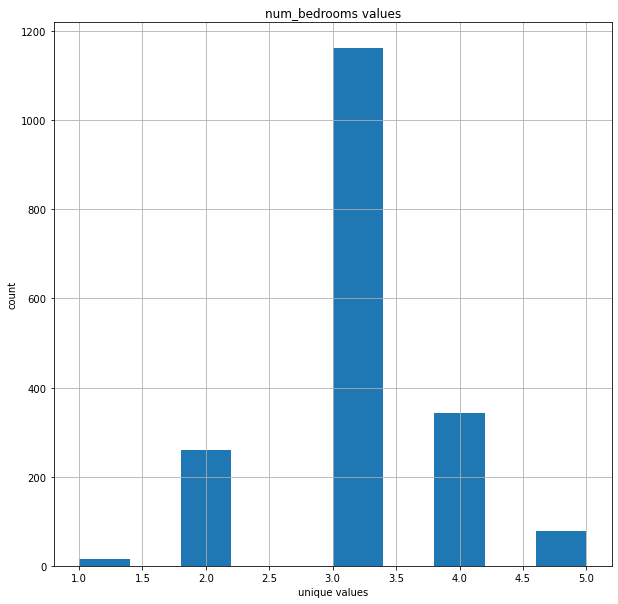

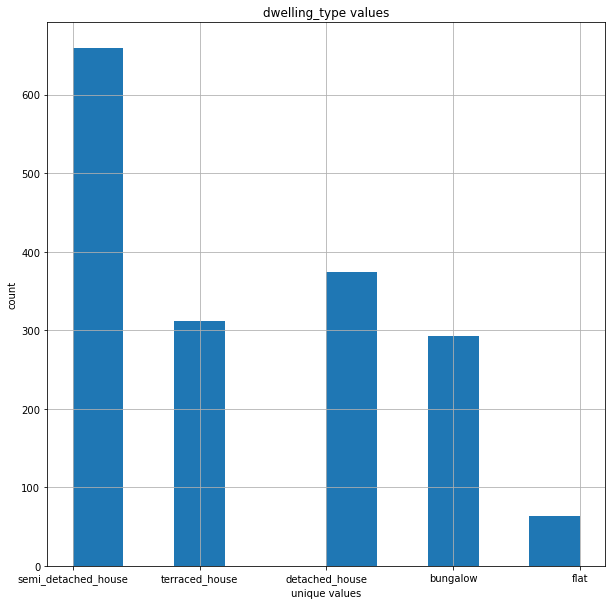

In [159]:
# plotting a histogram for each of the imputed columns in the dataset before imputation
for column in df_info_knn_finished.drop(["meter_id"],axis=1).columns:
    df_temp = df_info_all_meters[column]
    ax = df_temp.hist(figsize=(10,10))
    ax.set_xlabel("unique values")
    ax.set_ylabel("count")
    fig = ax.get_figure()
    plt.title(column+" values")
    plt.show(block=False)
    
    if(os.path.exists(f"../EDA/plots/addInfo/Pre-Imputation/{column}_preimp_hist.png")==False):
        fig.savefig(f"../EDA/plots/addInfo/Pre-Imputation/{column}_preimp_hist.png")
        
    plt.close(fig)

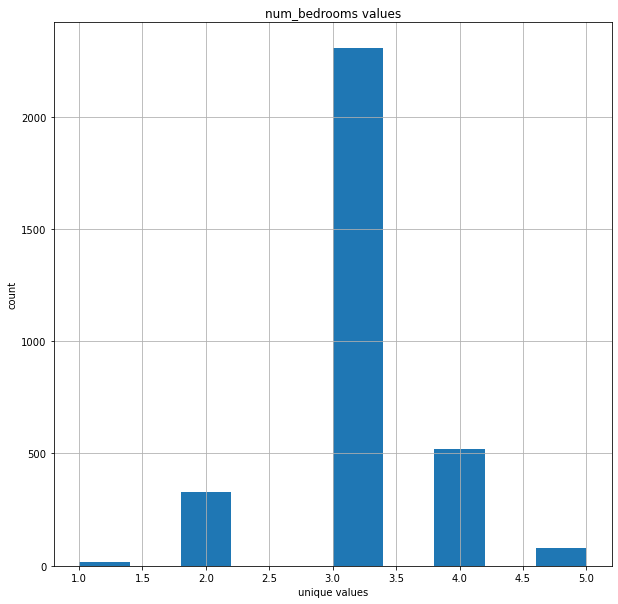

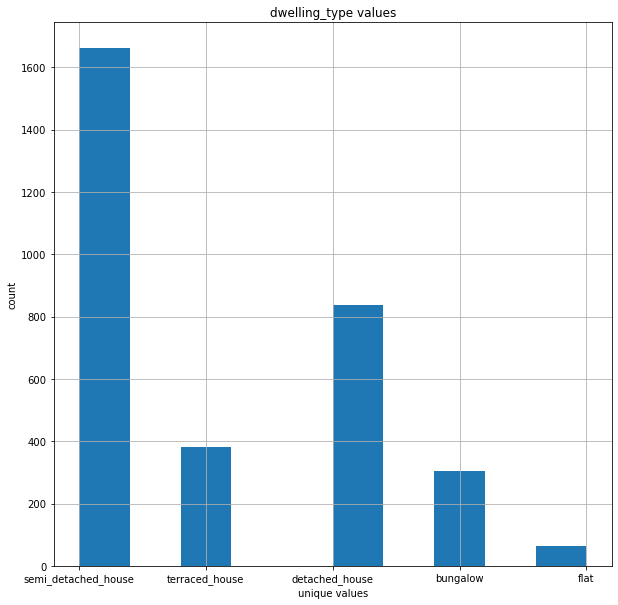

In [160]:
# plotting a histogram for each of the columns in the dataset after imputation
for column in df_info_knn_finished.drop(["meter_id"],axis=1).columns:
    df_temp = df_info_knn_finished[column]
    ax = df_temp.hist(figsize=(10,10))
    ax.set_xlabel("unique values")
    ax.set_ylabel("count")
    fig = ax.get_figure()
    plt.title(column+" values")
    plt.show(block=False)
    
    if(os.path.exists(f"../EDA/plots/addInfo/Imputed/{column}_imp_hist.png")==False):
        fig.savefig(f"../EDA/plots/addInfo/Imputed/{column}_imp_hist.png")
        
    plt.close(fig)

## OneHot Encoding Ready for the RNN to make use of

In [161]:
#encoding the categorical values via one hot encoding
cat_variables = df_info_knn_finished[df_info_knn_finished.loc[:,df_info_knn_finished.columns!="meter_id"].select_dtypes(include=['object']).columns] # getting the categorical columns (just 'dwelling_type')
cat_dummies = pd.get_dummies(cat_variables, drop_first=True, dummy_na=True) # getting dummies, including a separate one for na

#setting nan rows and droppoing nan column
cat_dummies.loc[cat_dummies.dwelling_type_nan==1, ["dwelling_type_detached_house","dwelling_type_flat","dwelling_type_semi_detached_house","dwelling_type_terraced_house"]]=np.nan
cat_dummies=cat_dummies.drop("dwelling_type_nan",axis=1)
cat_dummies

dwelling_type_detached_house  dwelling_type_flat  \
0                              0.0                 0.0   
1                              0.0                 0.0   
2                              0.0                 0.0   
3                              1.0                 0.0   
4                              1.0                 0.0   
...                            ...                 ...   
3243                           0.0                 0.0   
3244                           0.0                 0.0   
3245                           1.0                 0.0   
3246                           0.0                 0.0   
3247                           1.0                 0.0   

      dwelling_type_semi_detached_house  dwelling_type_terraced_house  
0                                   1.0                           0.0  
1                                   0.0                           1.0  
2                                   1.0                           0.0  
3                                   0.0                           0.0  
4                                   0.0                           0.0  
...                                 ...                           ...  
3243                                1.0                           0.0  
3244                                1.0                           0.0  
3245                                0.0                           0.0  
3246                                1.0                           0.0  
3247                                0.0                           0.0  

[3248 rows x 4 columns]

In [162]:
# dropping those original columns then adding the dummy values
df_info_knn_finished = df_info_knn_finished.drop(df_info_knn_finished.loc[:,df_info_knn_finished.columns!="meter_id"].select_dtypes(include=['object']).columns, axis=1)
df_info_knn_finished = pd.concat([df_info_knn_finished, cat_dummies], axis=1)
# inspecting new state of the dataframe with the dummy variables
df_info_knn_finished

meter_id  num_bedrooms  \
0     0x02b7418b821b2edeeb2baa23ba1580566b4b0e43           3.0   
1     0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41           2.0   
2     0xdd45ab28a7a40eadc04607d6da42e5ad923b1339           3.0   
3     0x2b538a5ebfc3780aef25227267063cb6410d943b           4.0   
4     0xee032ed498c9e99a4c65e0f39896fb30e513c6b7           4.0   
...                                          ...           ...   
3243  0xdf6a54b92985398af03423426e744c6d40ee8c69           4.0   
3244  0x6b6ddc9a73405caab50c8d5575b72288aaa7e844           3.0   
3245  0xd67e6b5f31d5286a2d4eec159b972e7f2197a67b           3.0   
3246  0x7dd7a7b8ee1bec7c44b24f738c752482f6161065           3.0   
3247  0x47218b46abb2fcaade487a211911406dc6e13730           4.0   

      dwelling_type_detached_house  dwelling_type_flat  \
0                              0.0                 0.0   
1                              0.0                 0.0   
2                              0.0                 0.0   
3                              1.0                 0.0   
4                              1.0                 0.0   
...                            ...                 ...   
3243                           0.0                 0.0   
3244                           0.0                 0.0   
3245                           1.0                 0.0   
3246                           0.0                 0.0   
3247                           1.0                 0.0   

      dwelling_type_semi_detached_house  dwelling_type_terraced_house  
0                                   1.0                           0.0  
1                                   0.0                           1.0  
2                                   1.0                           0.0  
3                                   0.0                           0.0  
4                                   0.0                           0.0  
...                                 ...                           ...  
3243                                1.0                           0.0  
3244                                1.0                           0.0  
3245                                0.0                           0.0  
3246                                1.0                           0.0  
3247                                0.0                           0.0  

[3248 rows x 6 columns]

## Generating correlation plot of the features to make sure there is minimal redundancy

In [163]:
#generating the correlation matrix
corr_info = df_info_knn_finished.corr()

<AxesSubplot:>

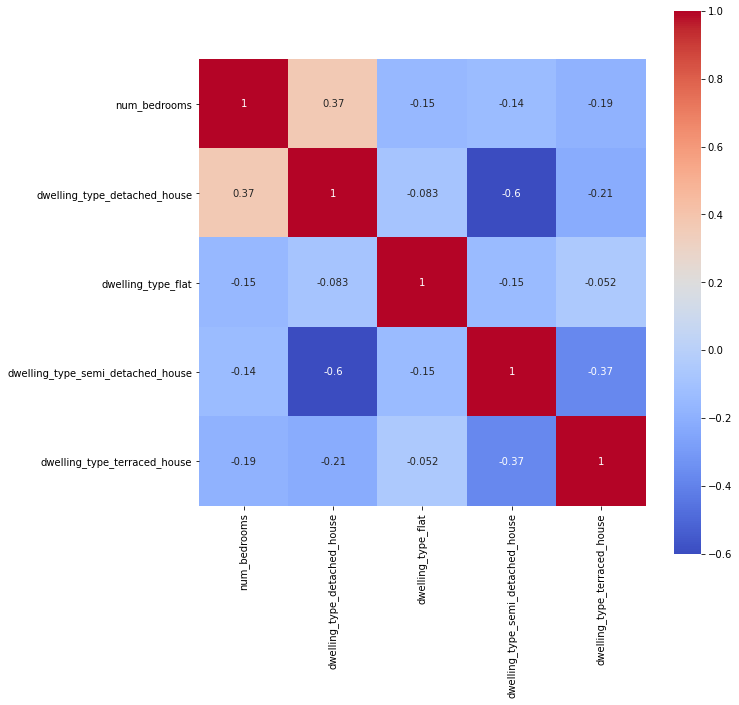

In [164]:
#generating the correlation heat map
plt.figure(figsize=(10, 10))
sns.heatmap(corr_info, cmap="coolwarm", annot=True, square=True)

In [165]:
# for each feature on the x axis
for i in range(corr_info.shape[0]):
    # for each feature after i
    for j in range(i+1, corr_info.shape[0]):
        #check if their correlation is above a threshold % (50%)
        if abs(corr_info.iloc[i,j]) >= 0.5:
            print("\nConsider ",corr_info.columns[j]," for removal as it has a high correlation with ",corr_info.columns[i]," of",round(corr_info.iloc[i,j],2),"\n")
            #set column j to be removed 
            if columns[j]:
                columns[j+1] = False #+1 for meter id
        else: 
            print("Keeping ",corr_info.columns[i]," and ",corr_info.columns[j]," have a correlation of ", round(corr_info.iloc[i,j],2))

Keeping  num_bedrooms  and  dwelling_type_detached_house  have a correlation of  0.37
Keeping  num_bedrooms  and  dwelling_type_flat  have a correlation of  -0.15
Keeping  num_bedrooms  and  dwelling_type_semi_detached_house  have a correlation of  -0.14
Keeping  num_bedrooms  and  dwelling_type_terraced_house  have a correlation of  -0.19
Keeping  dwelling_type_detached_house  and  dwelling_type_flat  have a correlation of  -0.08

Consider  dwelling_type_semi_detached_house  for removal as it has a high correlation with  dwelling_type_detached_house  of -0.6 

Keeping  dwelling_type_detached_house  and  dwelling_type_terraced_house  have a correlation of  -0.21
Keeping  dwelling_type_flat  and  dwelling_type_semi_detached_house  have a correlation of  -0.15
Keeping  dwelling_type_flat  and  dwelling_type_terraced_house  have a correlation of  -0.05
Keeping  dwelling_type_semi_detached_house  and  dwelling_type_terraced_house  have a correlation of  -0.37


##### Features don't have a particularly high correlation; no need to remove them based upon this

## Saving the finished AddInfo

In [166]:
if(os.path.exists(f"../Data/Preprocessed_Data/addInfo_knn.pkl")==False):
        df_info_knn_finished.to_pickle(f"../Data/Preprocessed_Data/addInfo_knn.pkl")